In [16]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性
import os
from scipy import stats
from scipy.stats import norm, skew 

plt.rc("font",family="cmmi10",size="15")  #解决中文乱码问题

# 在 jupyter notebook 里面显示图表
%matplotlib inline 

In [36]:
test_data = pd.read_csv(r"../data/house-prices-advanced-regression-techniques/test.csv")
#test_data

In [37]:
train_data = pd.read_csv(r"../data/house-prices-advanced-regression-techniques/train.csv")
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [61]:
train = train_data.drop("SalePrice",axis = 1)
all_data= pd.concat((train, test_data)).reset_index(drop=True)
all_data.index = all_data["Id"]
all_data = all_data.drop("Id",axis =1)
#all_data

In [68]:
missing[missing == 0]

TypeError: 'int' object is not subscriptable

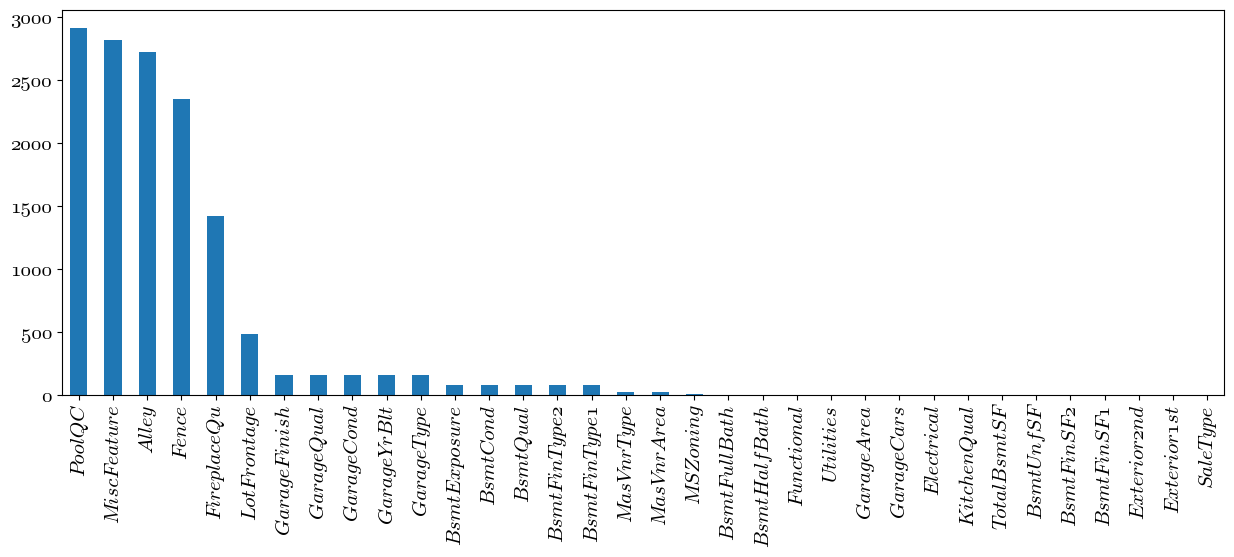

In [69]:
import matplotlib.pyplot as plt
import missingno as msno

missing = all_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True,ascending = False)
plt.subplots(figsize=(15,5)) # 設定畫面大小
missing.plot.bar()
plt.show()

In [70]:
missing.value_counts()

1       11
159      4
2        4
82       2
1420     1
486      1
2348     1
157      1
2814     1
81       1
80       1
79       1
24       1
23       1
4        1
2721     1
2909     1
dtype: int64

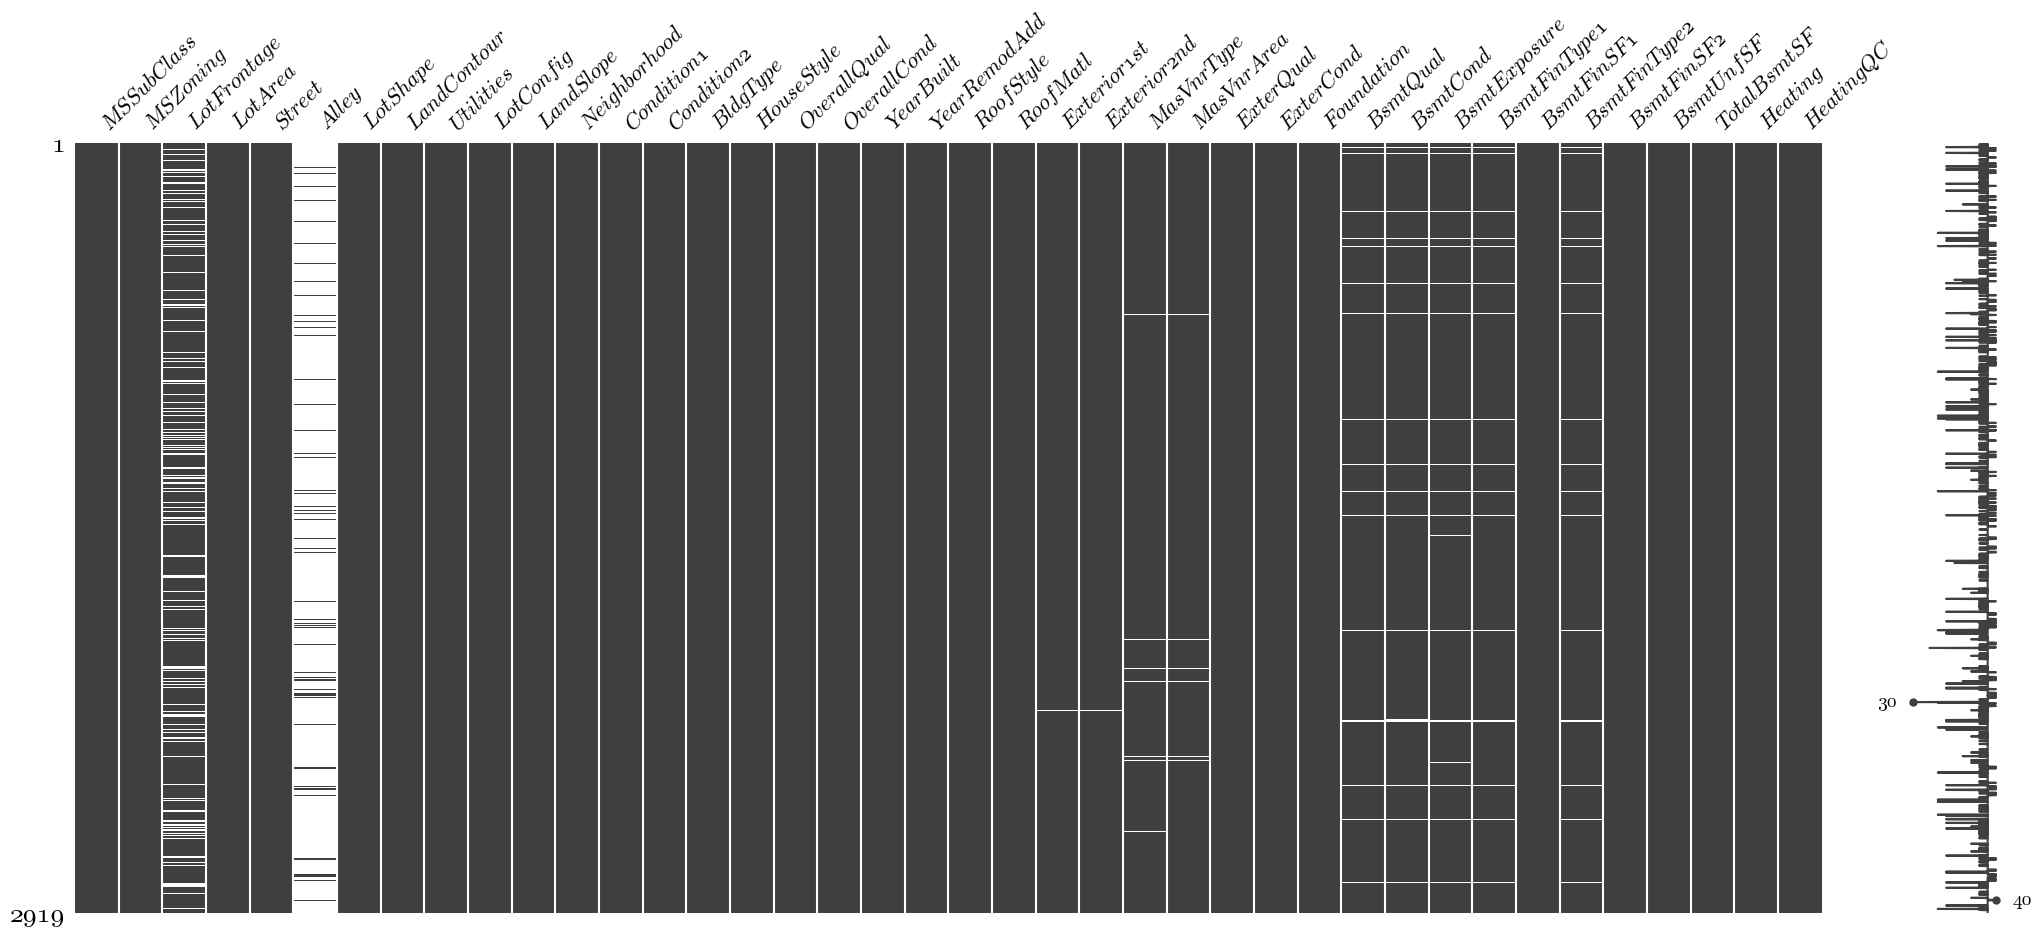

In [71]:
msno.matrix(all_data.iloc[:,:40])
plt.show()

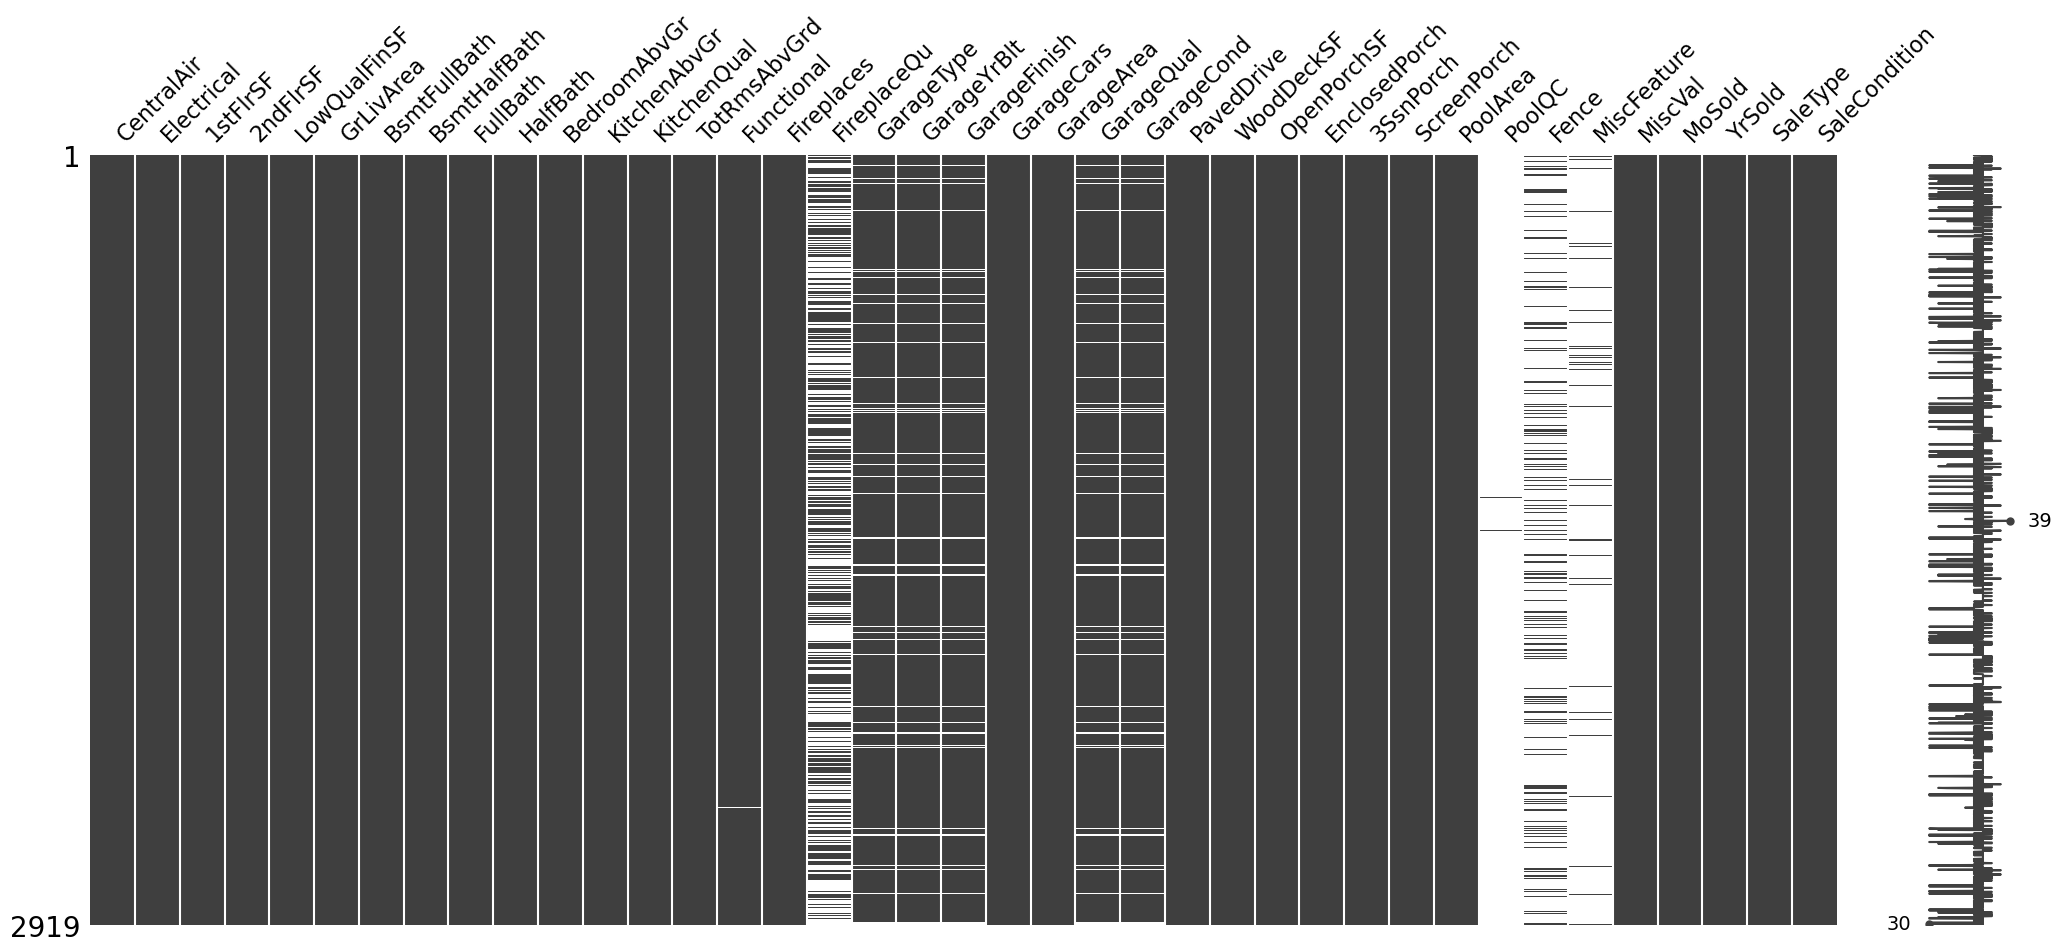

In [97]:
msno.matrix(all_data.iloc[:,40:])
plt.show()

In [41]:
all_data.isnull().sum().sort_values(ascending = False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

In [77]:
len(all_data)

2919

In [42]:
null_rate = all_data.isnull().sum() / len(all_data) *100
null_rate.sort_values(ascending = False).head(35)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
SaleType         0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
GarageCars       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
GarageArea       0.034258
Electrical       0.034258
BsmtFinSF2       0.034258
TotRmsAbvGrd     0.000000
dtype: float64

In [81]:
sector = all_data.groupby("Neighborhood").median()
print(sector)

              MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
Neighborhood                                                               
Blmngtn            120.0         43.0   3189.0          7.0          5.0   
Blueste            160.0         24.0   1830.5          6.0          6.0   
BrDale             160.0         21.0   1680.0          6.0          5.0   
BrkSide             50.0         51.0   6167.5          5.0          6.0   
ClearCr             50.0         80.5  15588.5          6.0          5.0   
CollgCr             20.0         70.0   9675.0          7.0          5.0   
Crawfor             50.0         70.0  11275.0          6.0          6.0   
Edwards             50.0         65.0   9345.0          5.0          5.0   
Gilbert             60.0         64.0   9729.0          7.0          5.0   
IDOTRR              50.0         60.0   8250.0          5.0          6.0   
MeadowV            160.0         21.0   1890.0          4.0          6.0   
Mitchel     

C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\2016765752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector = all_data.groupby("Neighborhood").median()


In [82]:
#PoolQC:游泳池等級,MiscFeature:其他類別未涵蓋的其他功能,Alley:胡同類型,Fence:圍欄等級,FireplaceQu:壁爐等級
for col in ("PoolQC","MiscFeature","Alley","Fence","FireplaceQu"):
    all_data[col] = all_data[col].fillna("None")

In [83]:
#LotFrontage:與房子相連的街道距離，可能與同區域間的房子相似，所以拿Neighborhood同區的中位數當作替代值
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [84]:
#GarageCond:車庫條件,GarageQual:車庫等級,GarageFinish:車庫內部裝潢,GarageType:車庫位置
for col in ("GarageCond","GarageQual","GarageFinish","GarageType"):
    all_data[col] = all_data[col].fillna("None")

In [85]:
#GarageYrBlt:車庫建照年份,GarageArea:車庫面積,GarageCars:車庫可容納車子的數量(為數值，所以缺值直接補0)
for col in ("GarageYrBlt","GarageArea","GarageCars"):
    all_data[col] = all_data[col].fillna(0)

In [86]:
#BsmtCond : 地下室的狀況,BsmtExposure:地下室採光程度,BsmtQual:地下室高度,BsmtFinType1:地下室1的等級,BsmtFinType2:地下室2的等級
for col in ("BsmtCond","BsmtExposure","BsmtQual","BsmtFinType1","BsmtFinType2"):
    all_data[col] = all_data[col].fillna("None")
#BsmtFinSF1:地下室1的面積,BsmtFinSF2:地下室2的面積,BsmtHalfBath:地下室半浴室數量,BsmtFullBath:地下室全浴室數量,BsmtUnfSF:未完成的地下室面積,TotalBsmtSF:地下室總面積(為數值，所以缺值直接補0)
for col in ("BsmtFinSF1","BsmtFinSF2","BsmtHalfBath","BsmtFullBath","BsmtUnfSF","TotalBsmtSF",):
    all_data[col] = all_data[col].fillna(0)

In [87]:
#MasVnrType:砌體材質
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
#MasVnrArea:砌體面積
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [88]:
#MSZoning:銷售的住宅類型，正常應該要有值，所以這裡應該是真的遺漏掉的值，並非沒有的狀況，所以拿最多的RL(低密度住宅區)來代替
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

In [89]:
#Utilities:水電等公共設施種類，雖然公共設施越多應該要月貴，但該特徵值除了1個NoSeWa以及2個nan外，其餘都是AllPub，而NoSeWa正好又在訓練集，對於我們預測的數據沒有幫助，所以可以直接刪除這個特徵值
all_data =  all_data.drop(["Utilities"],axis=1) 

In [90]:
#Functional:家電功能等級，Typ為典型的，也就是一般的，所以2個缺值的部分可以補成Typ
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [91]:
#Exterior1st,Exterior2nd:房屋外牆飾面，只有1個缺值，所以用最多的數值補
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])
all_data["Exterior2nd"]= all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])

#SaleType:銷售類型，缺值一樣只有一個，所以用最普遍的WD(常規的契約)來替補
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

#Electrical:電力系統，缺值只有一個，所有用最普遍的SBrkr(標準的電力系統)來替補
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])


#KitchenQual:廚房等級，缺值只有一個，所以用最普遍的TA(典型(中等)的等級)來替補
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])

In [92]:
all_data.isnull().sum().sort_values(ascending = False)

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
SaleCondition    0
Length: 78, dtype: int64

In [99]:
all_data[all_data.dtypes[all_data.dtypes == object].index][:len(train_data)]

MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
Id                                                                    
1          RL   Pave  None      Reg         Lvl    Inside       Gtl   
2          RL   Pave  None      Reg         Lvl       FR2       Gtl   
3          RL   Pave  None      IR1         Lvl    Inside       Gtl   
4          RL   Pave  None      IR1         Lvl    Corner       Gtl   
5          RL   Pave  None      IR1         Lvl       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...   
1456       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1457       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1458       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1459       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1460       RL   Pave  None      Reg         Lvl    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... GarageType GarageFinish  \
Id                                       ...                           
1         CollgCr       Norm       Norm  ...     Attchd          RFn   
2         Veenker      Feedr       Norm  ...     Attchd          RFn   
3         CollgCr       Norm       Norm  ...     Attchd          RFn   
4         Crawfor       Norm       Norm  ...     Detchd          Unf   
5         NoRidge       Norm       Norm  ...     Attchd          RFn   
...           ...        ...        ...  ...        ...          ...   
1456      Gilbert       Norm       Norm  ...     Attchd          RFn   
1457       NWAmes       Norm       Norm  ...     Attchd          Unf   
1458      Crawfor       Norm       Norm  ...     Attchd          RFn   
1459        NAmes       Norm       Norm  ...     Attchd          Unf   
1460      Edwards       Norm       Norm  ...     Attchd          Fin   

     GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
Id                                                                         
1            TA         TA          Y   None   None        None       WD   
2            TA         TA          Y   None   None        None       WD   
3            TA         TA          Y   None   None        None       WD   
4            TA         TA          Y   None   None        None       WD   
5            TA         TA          Y   None   None        None       WD   
...         ...        ...        ...    ...    ...         ...      ...   
1456         TA         TA          Y   None   None        None       WD   
1457         TA         TA          Y   None  MnPrv        None       WD   
1458         TA         TA          Y   None  GdPrv        Shed       WD   
1459         TA         TA          Y   None   None        None       WD   
1460         TA         TA          Y   None   None        None       WD   

     SaleCondition  
Id                  
1           Normal  
2           Normal  
3           Normal  
4          Abnorml  
5           Normal  
...            ...  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  
1460        Normal  

[1460 rows x 42 columns]

In [100]:
object_feature = all_data[all_data.dtypes[all_data.dtypes == object].index]
train_object = object_feature[:len(train_data)]
train_y = pd.DataFrame(train_data["SalePrice"])
train_y.index = train_data["Id"]
train_object["SalePrice"] = train_y
train_object 

C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\2346662495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_object["SalePrice"] = train_y


MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
Id                                                                    
1          RL   Pave  None      Reg         Lvl    Inside       Gtl   
2          RL   Pave  None      Reg         Lvl       FR2       Gtl   
3          RL   Pave  None      IR1         Lvl    Inside       Gtl   
4          RL   Pave  None      IR1         Lvl    Corner       Gtl   
5          RL   Pave  None      IR1         Lvl       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...   
1456       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1457       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1458       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1459       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1460       RL   Pave  None      Reg         Lvl    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... GarageFinish GarageQual  \
Id                                       ...                           
1         CollgCr       Norm       Norm  ...          RFn         TA   
2         Veenker      Feedr       Norm  ...          RFn         TA   
3         CollgCr       Norm       Norm  ...          RFn         TA   
4         Crawfor       Norm       Norm  ...          Unf         TA   
5         NoRidge       Norm       Norm  ...          RFn         TA   
...           ...        ...        ...  ...          ...        ...   
1456      Gilbert       Norm       Norm  ...          RFn         TA   
1457       NWAmes       Norm       Norm  ...          Unf         TA   
1458      Crawfor       Norm       Norm  ...          RFn         TA   
1459        NAmes       Norm       Norm  ...          Unf         TA   
1460      Edwards       Norm       Norm  ...          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  \
Id                                                                            
1            TA          Y   None   None        None       WD        Normal   
2            TA          Y   None   None        None       WD        Normal   
3            TA          Y   None   None        None       WD        Normal   
4            TA          Y   None   None        None       WD       Abnorml   
5            TA          Y   None   None        None       WD        Normal   
...         ...        ...    ...    ...         ...      ...           ...   
1456         TA          Y   None   None        None       WD        Normal   
1457         TA          Y   None  MnPrv        None       WD        Normal   
1458         TA          Y   None  GdPrv        Shed       WD        Normal   
1459         TA          Y   None   None        None       WD        Normal   
1460         TA          Y   None   None        None       WD        Normal   

     SalePrice  
Id              
1       208500  
2       181500  
3       223500  
4       140000  
5       250000  
...        ...  
1456    175000  
1457    210000  
1458    266500  
1459    142125  
1460    147500  

[1460 rows x 43 columns]

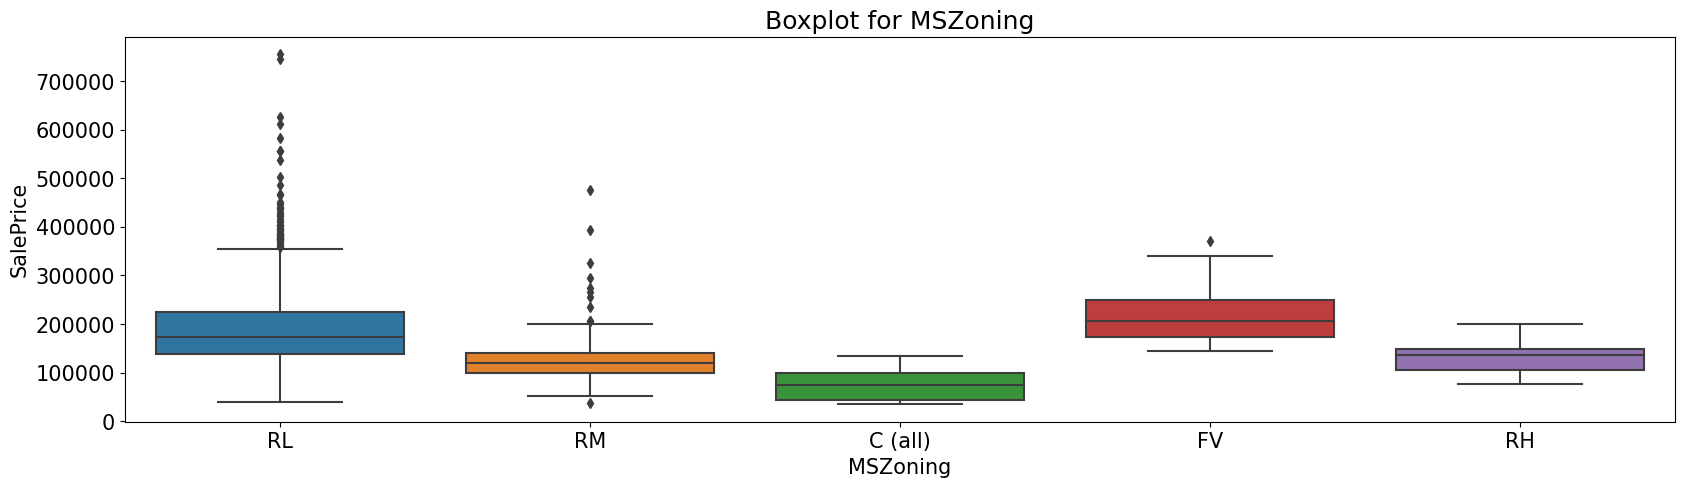

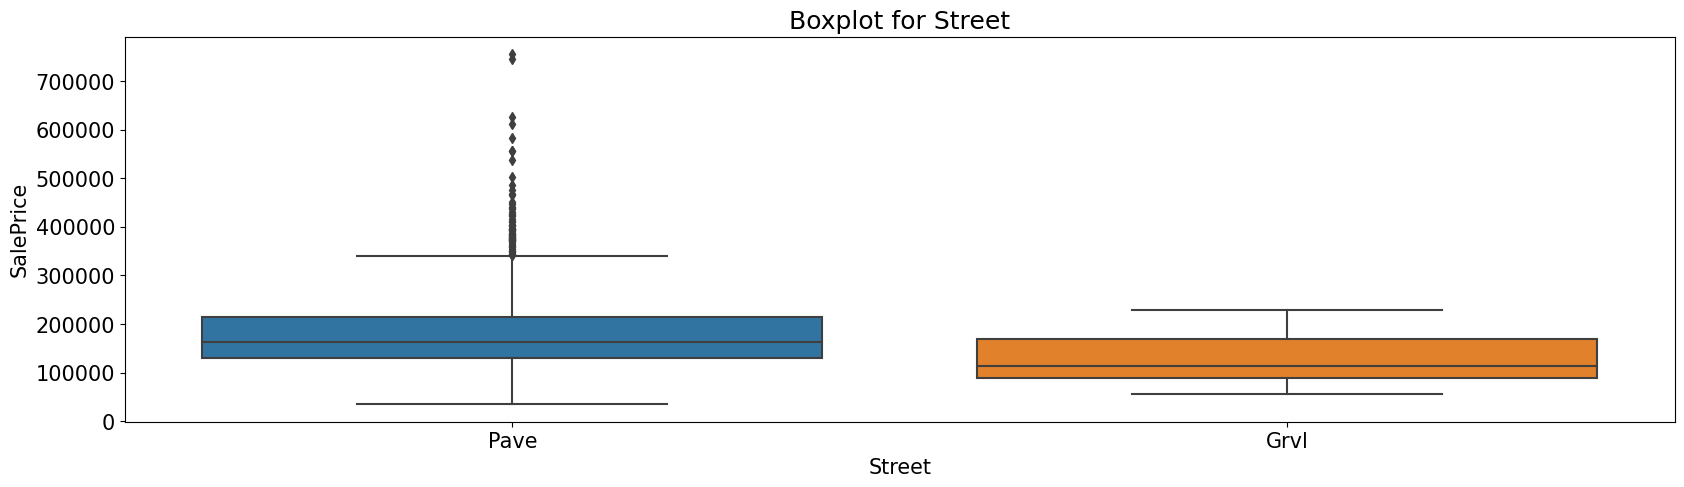

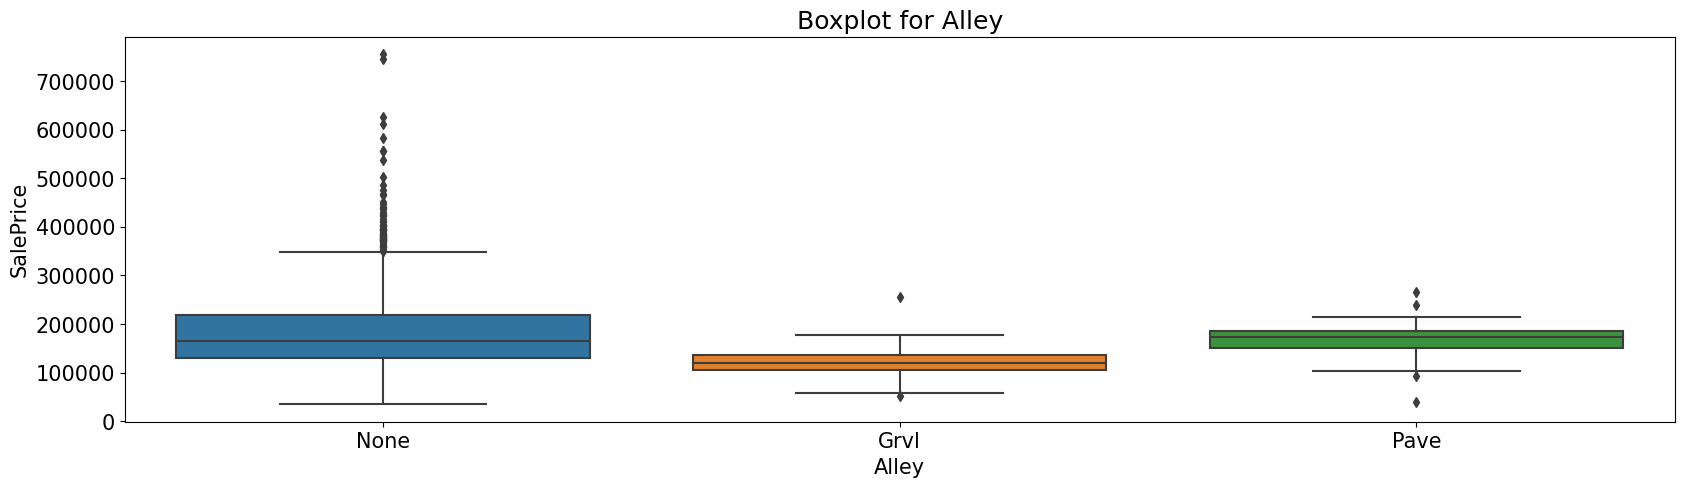

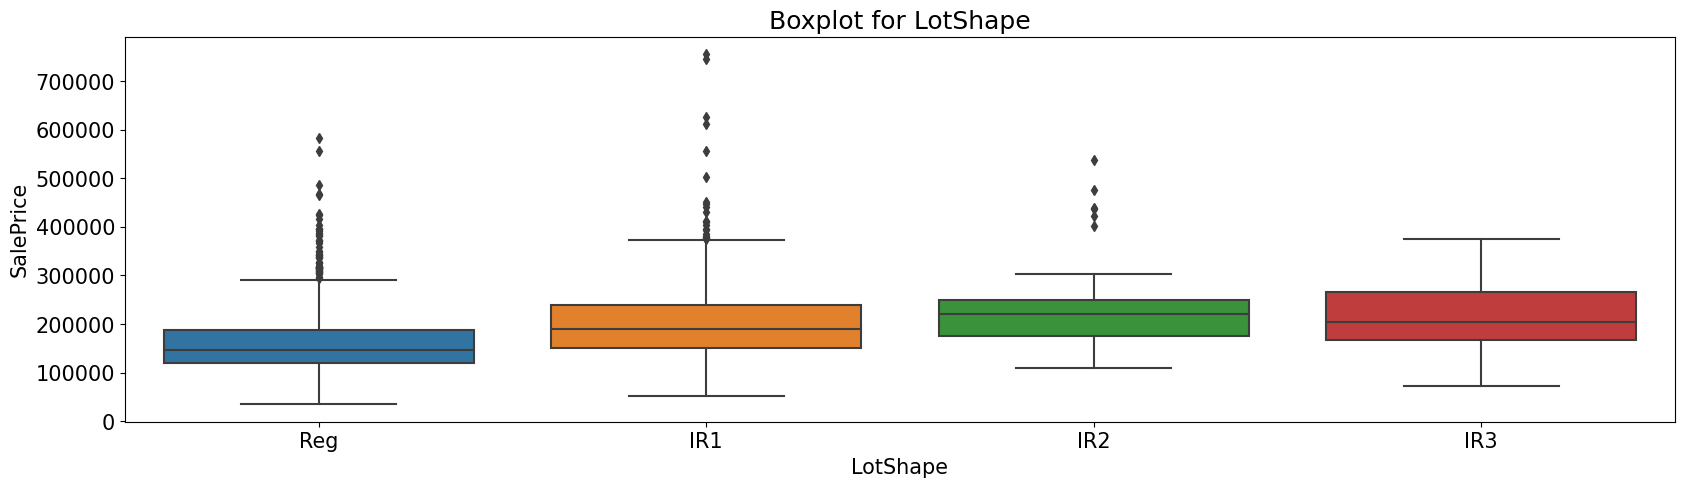

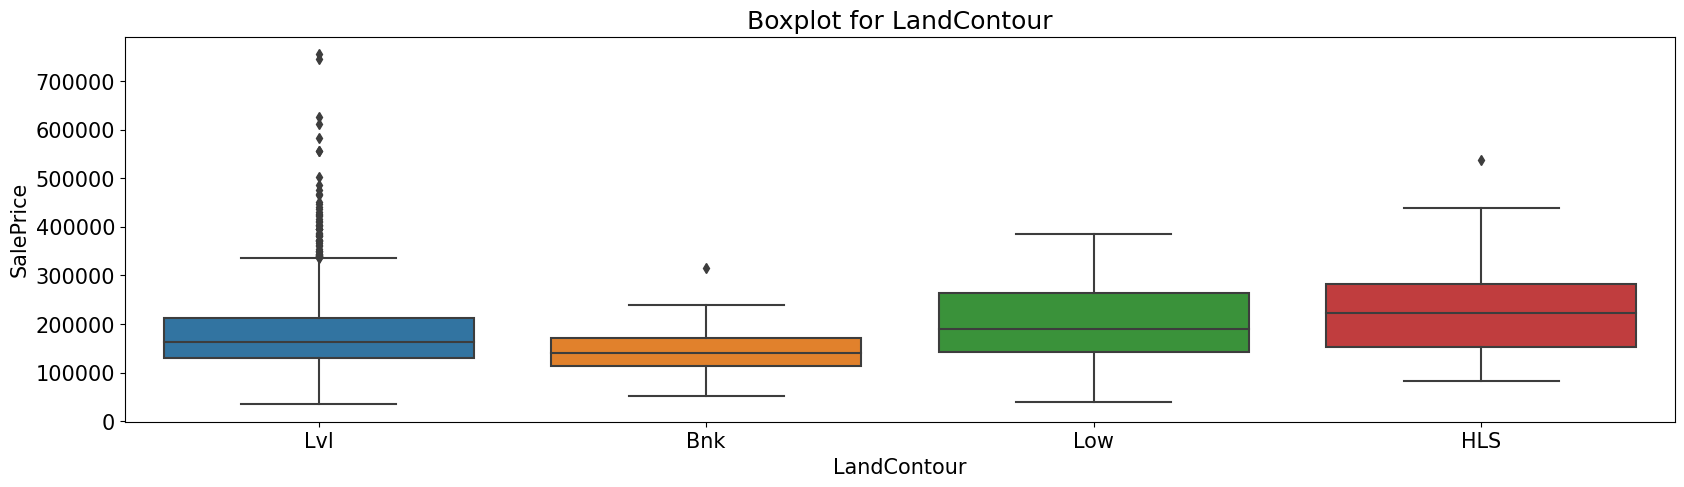

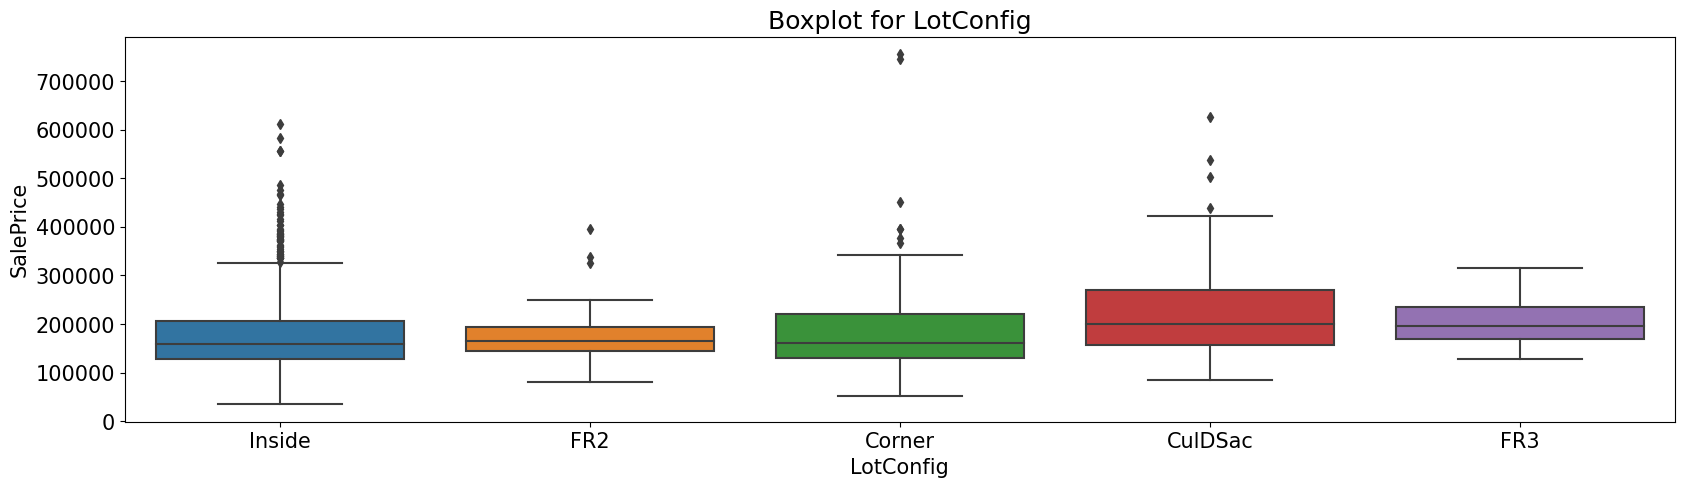

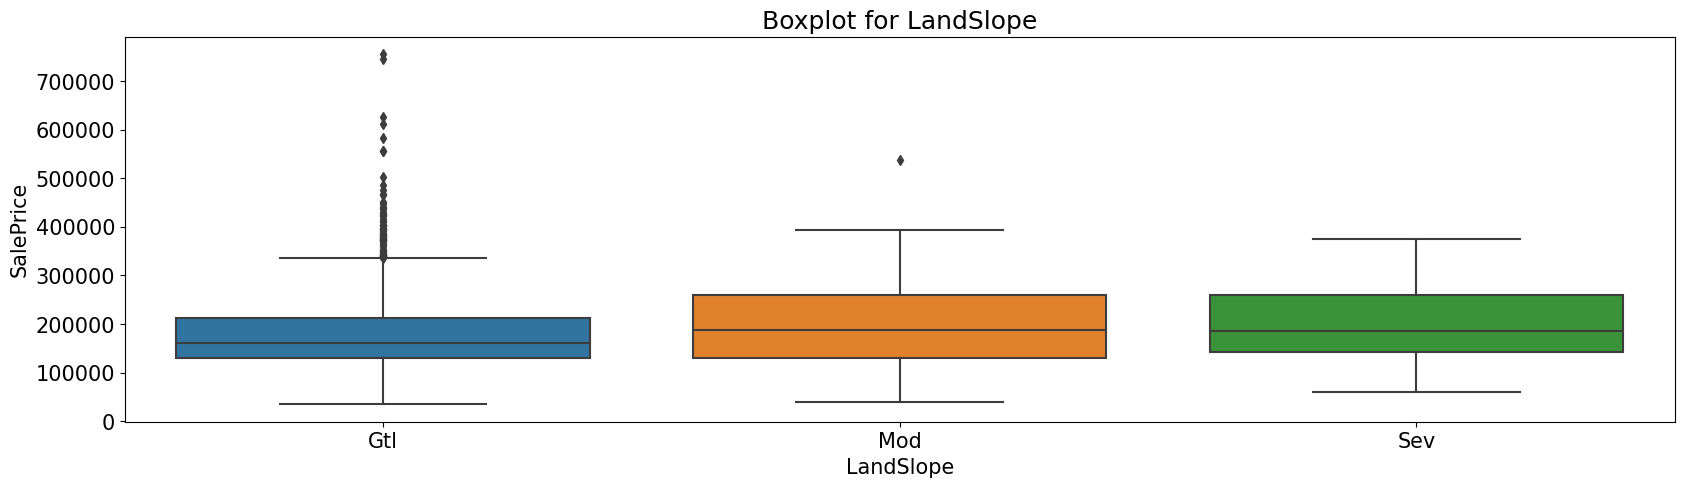

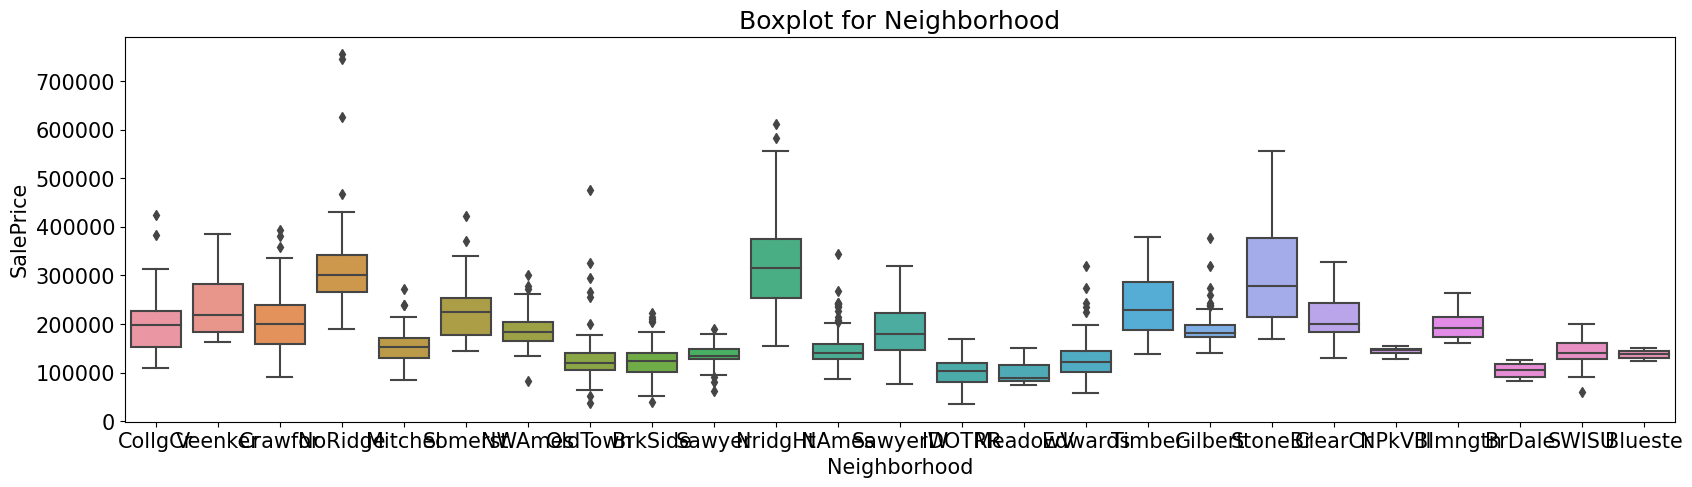

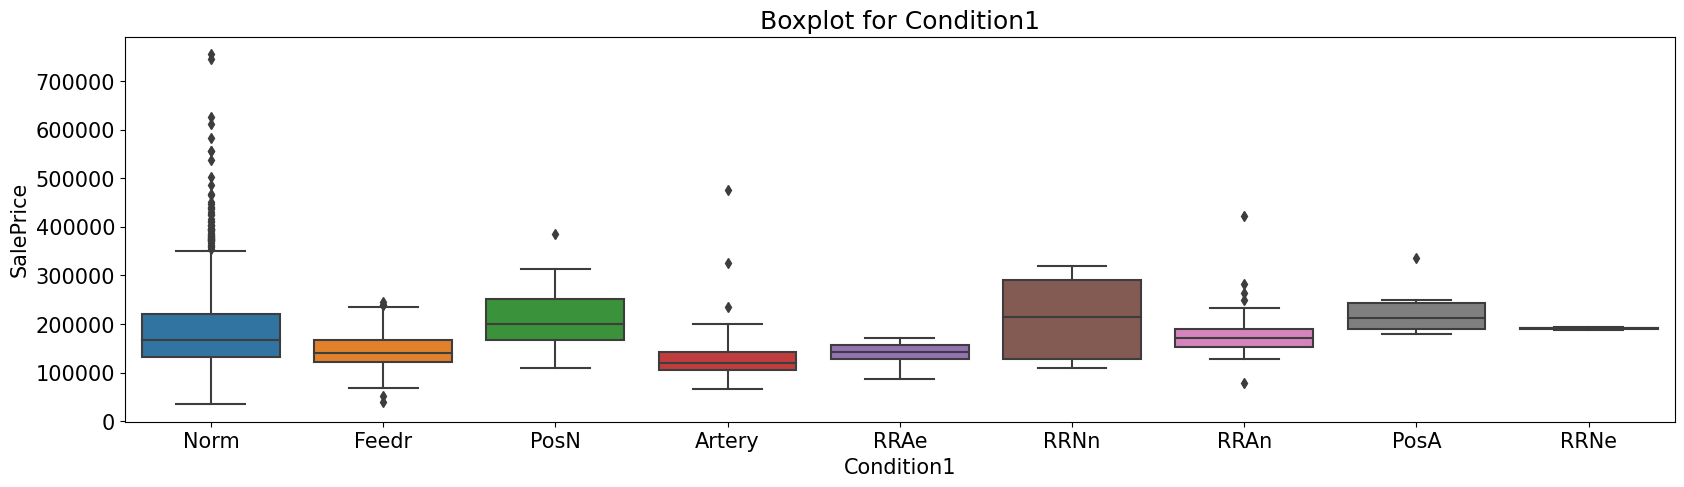

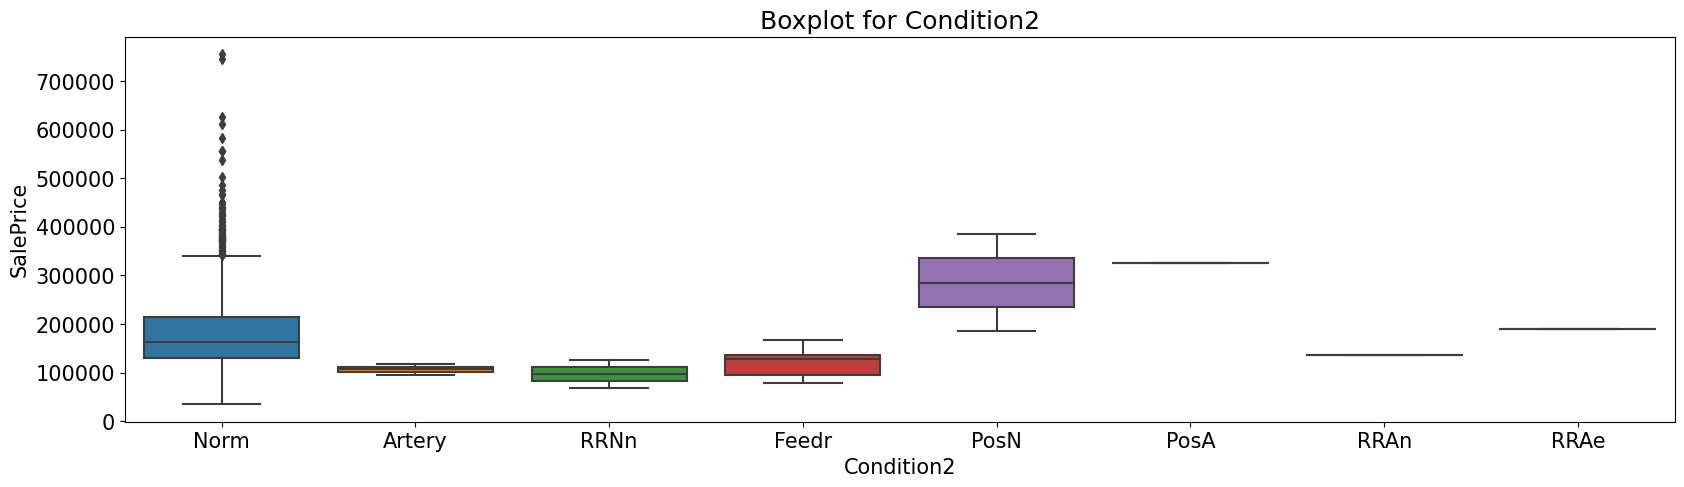

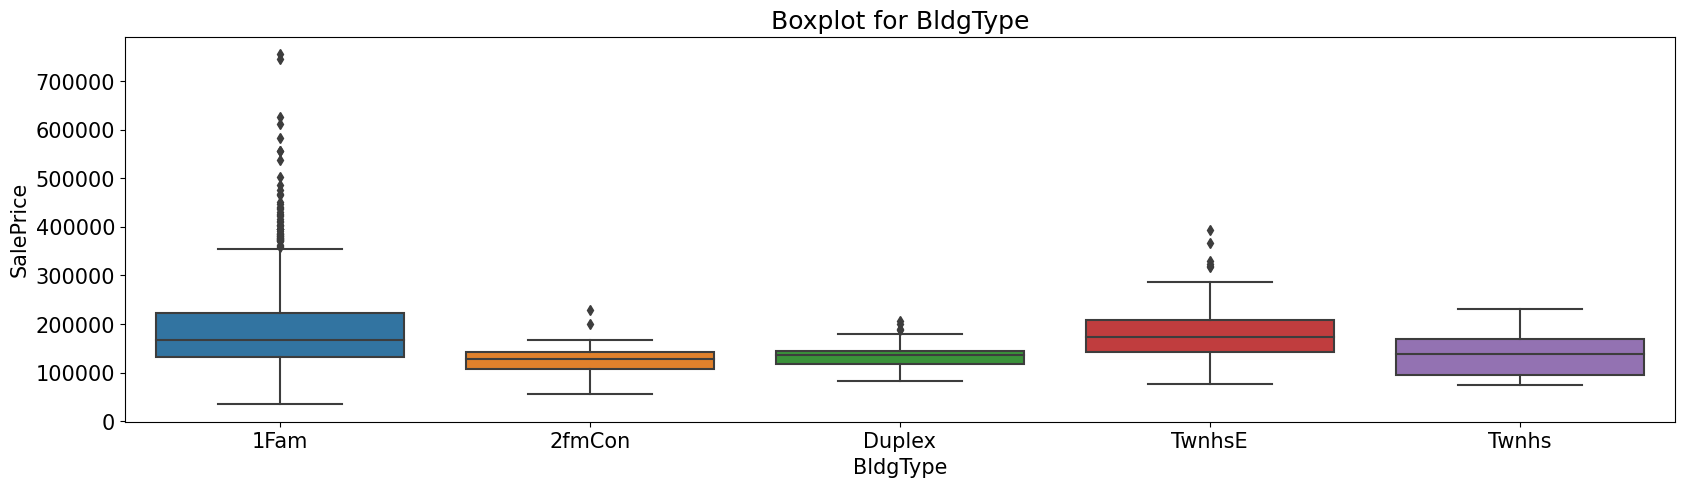

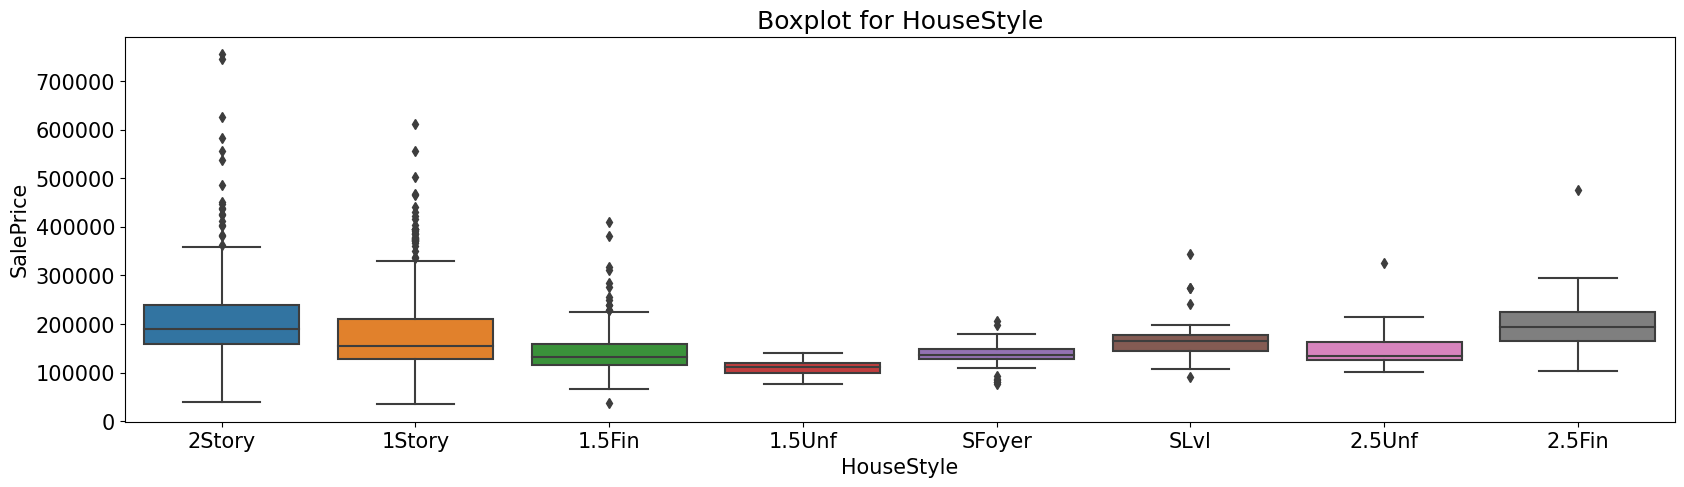

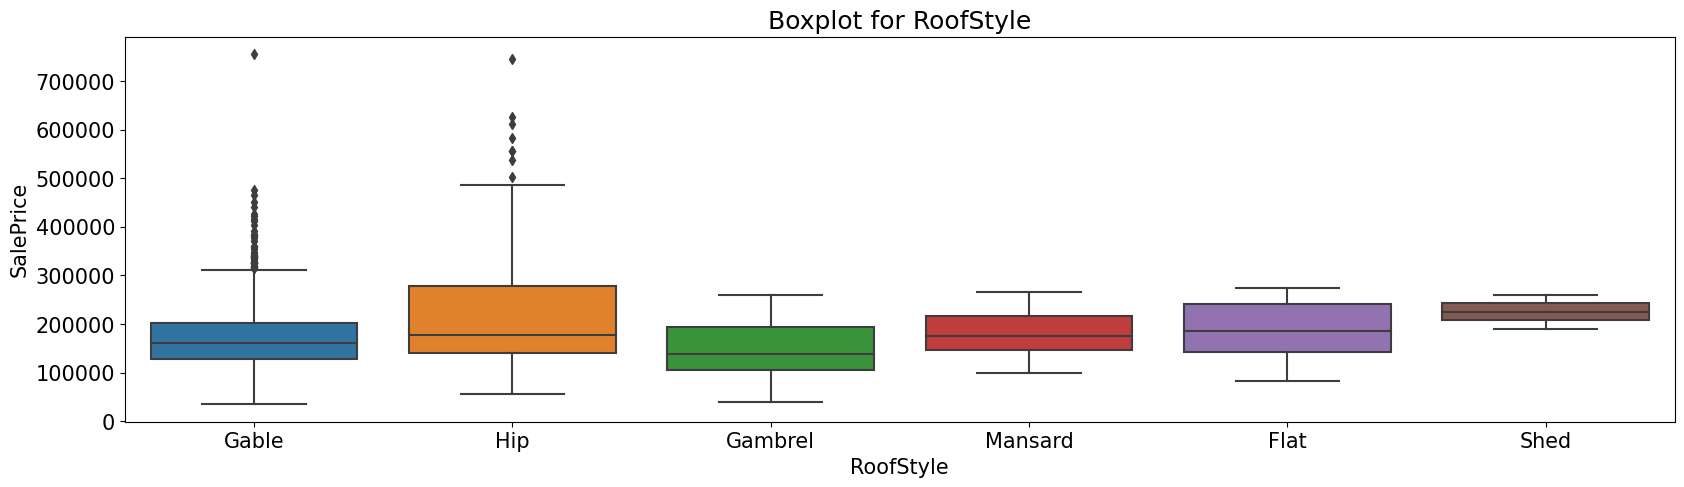

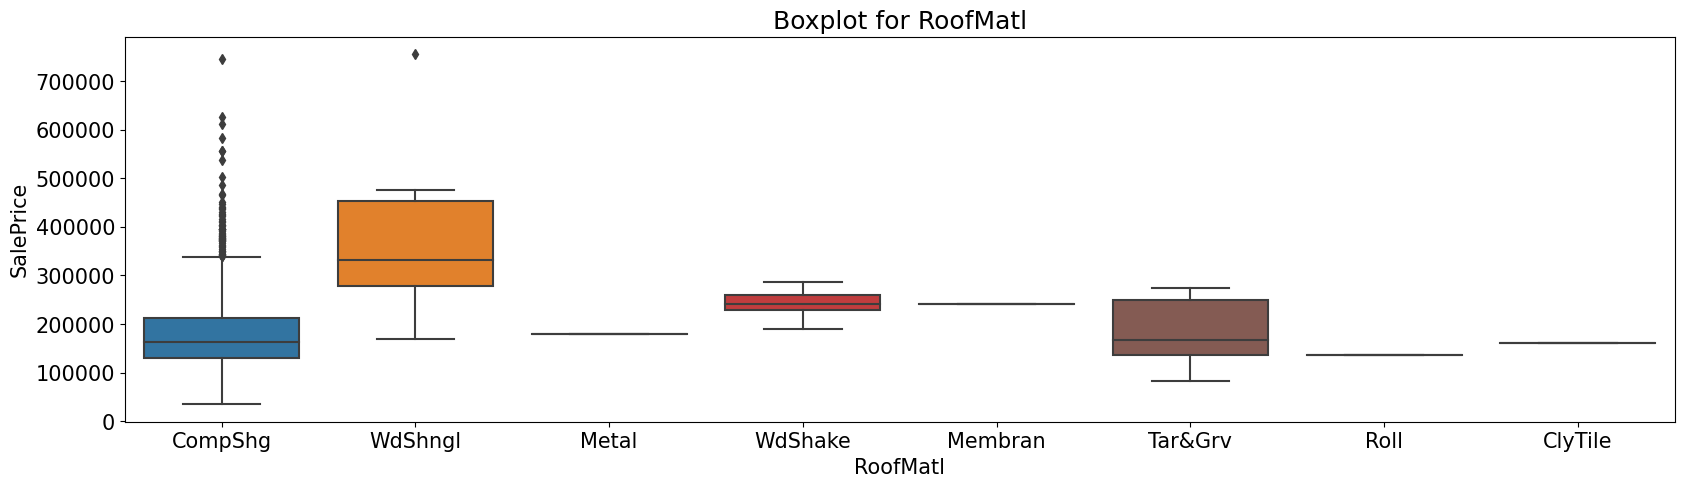

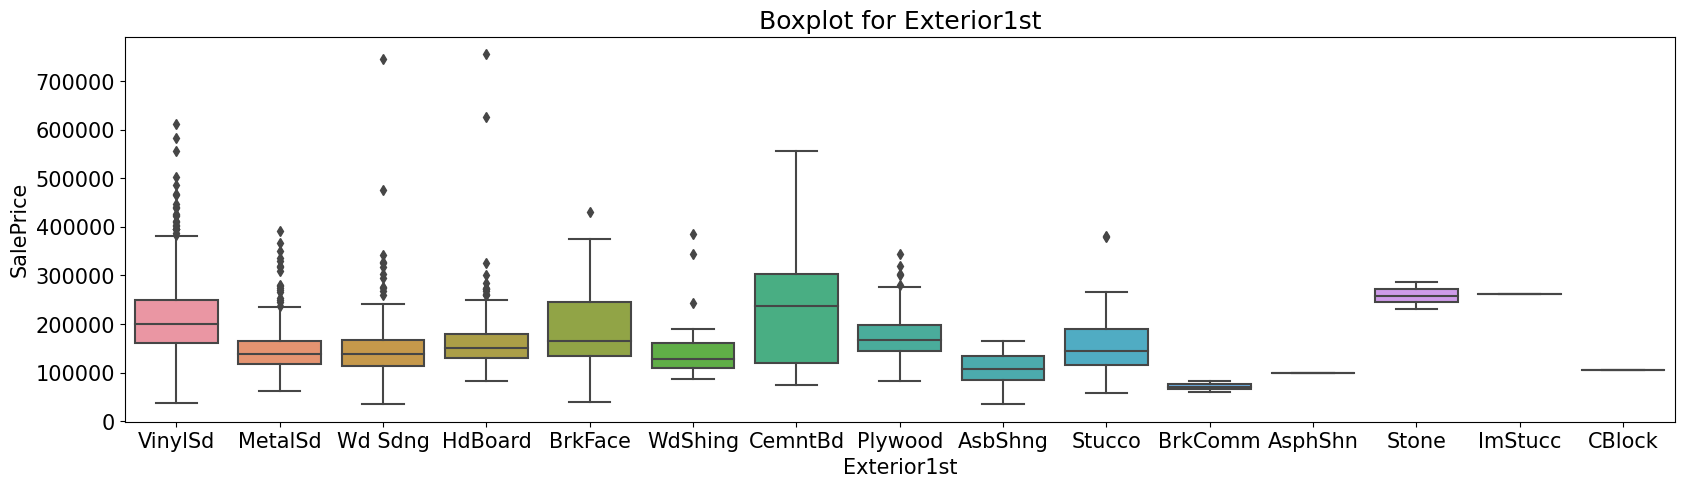

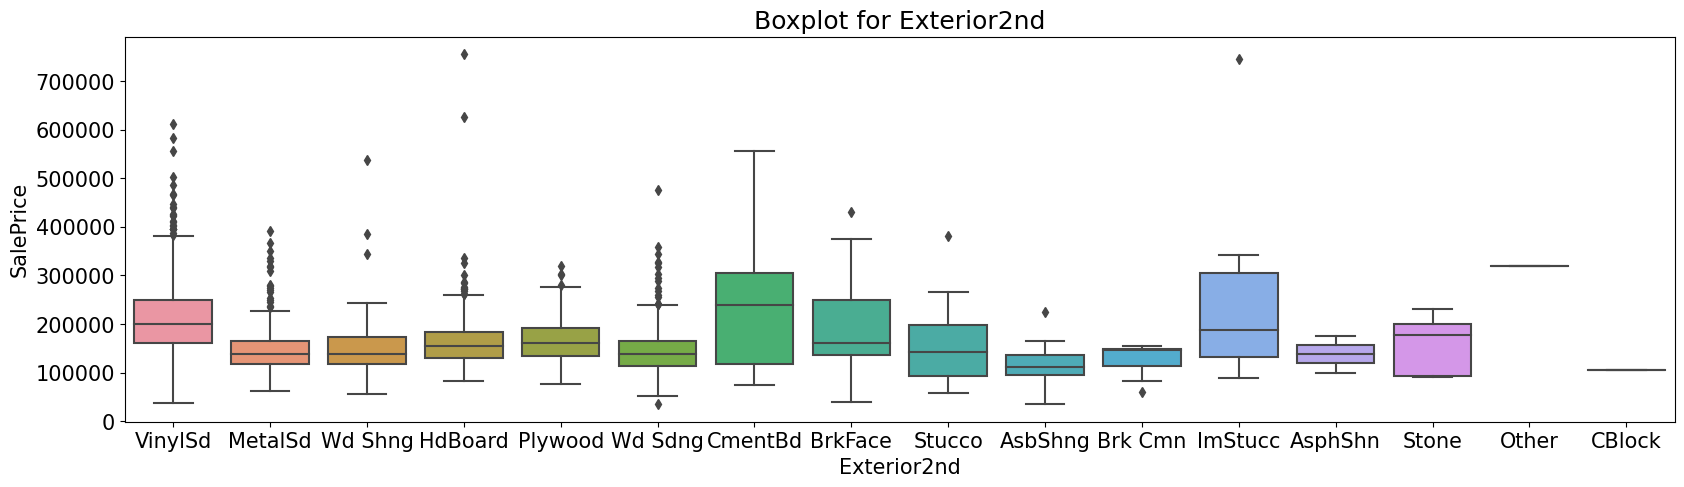

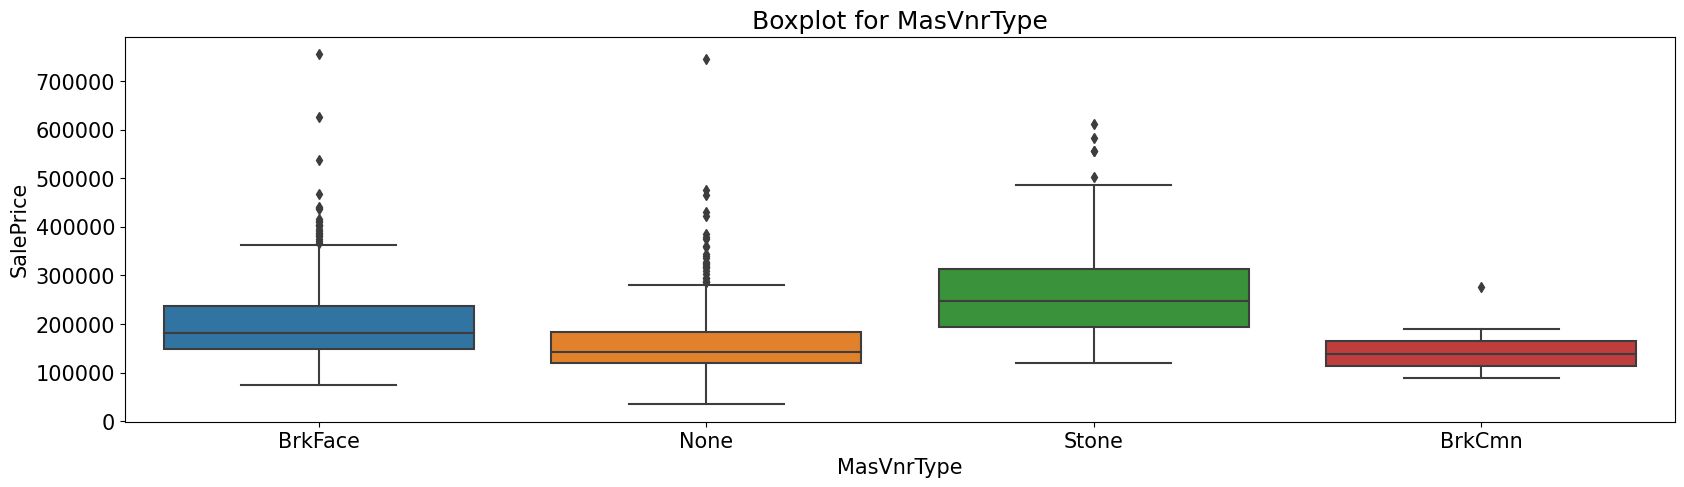

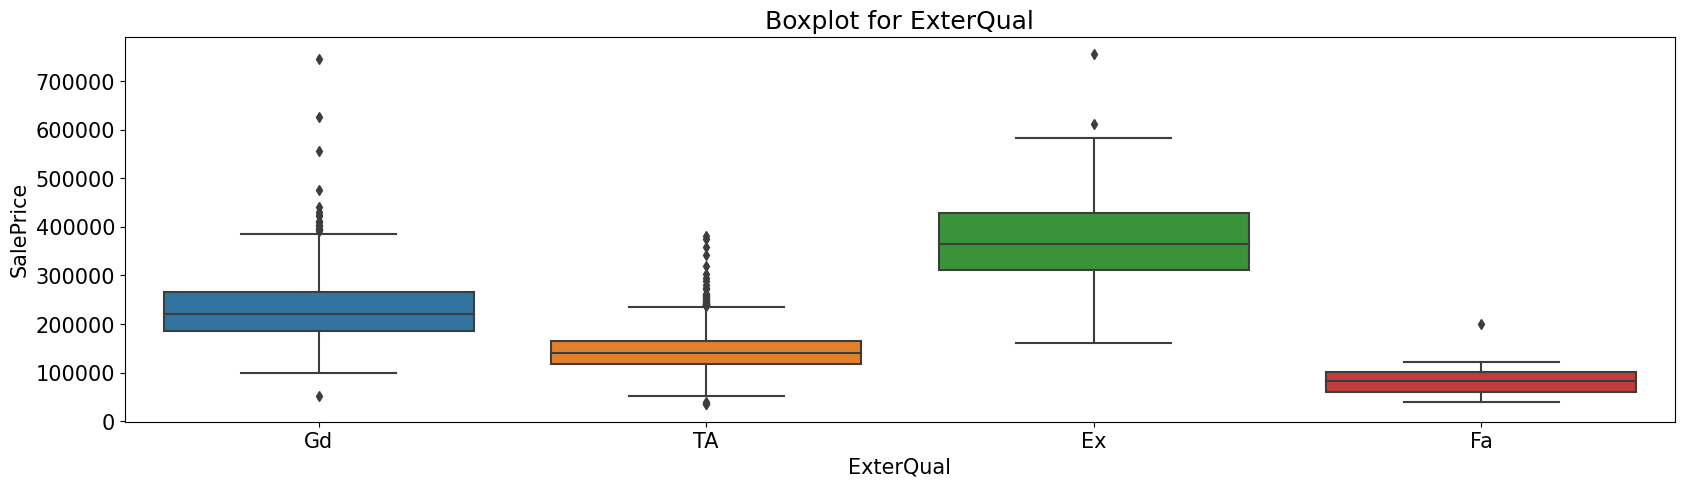

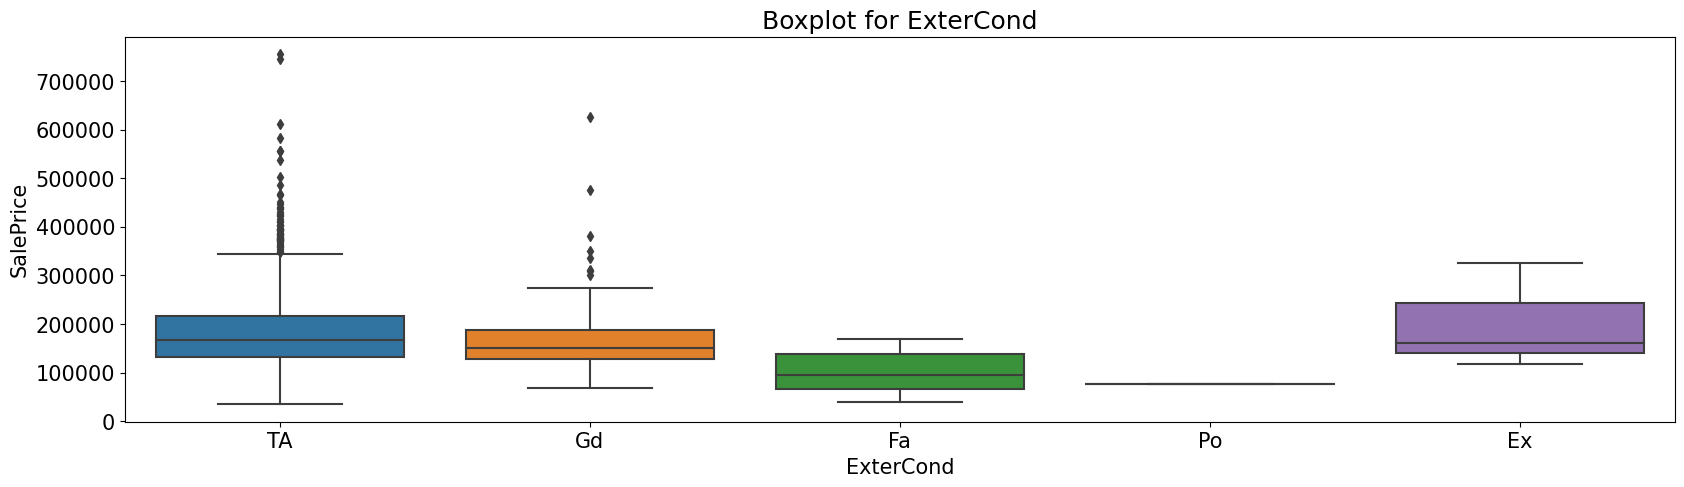

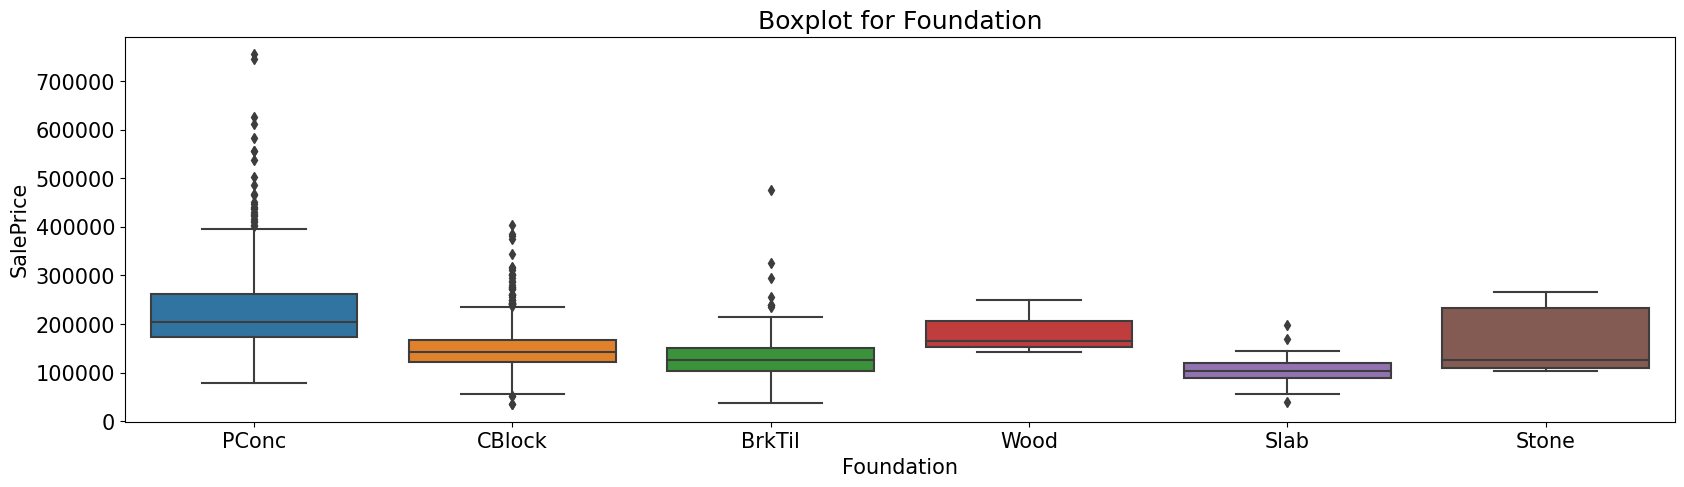

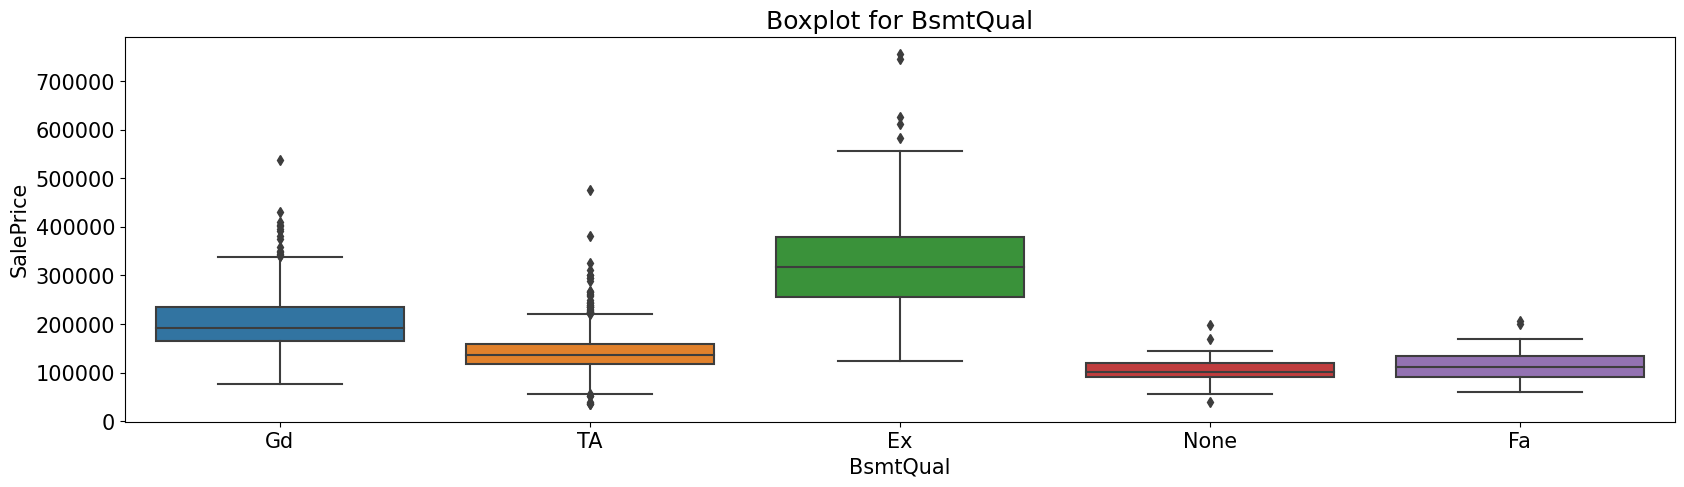

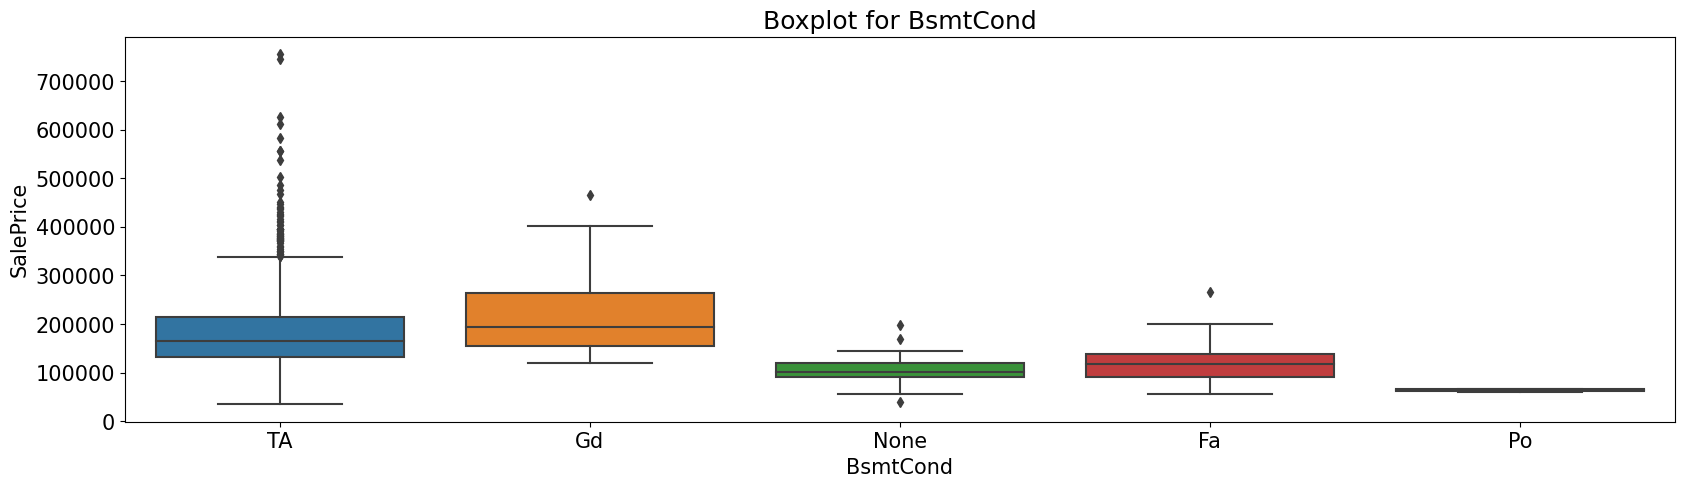

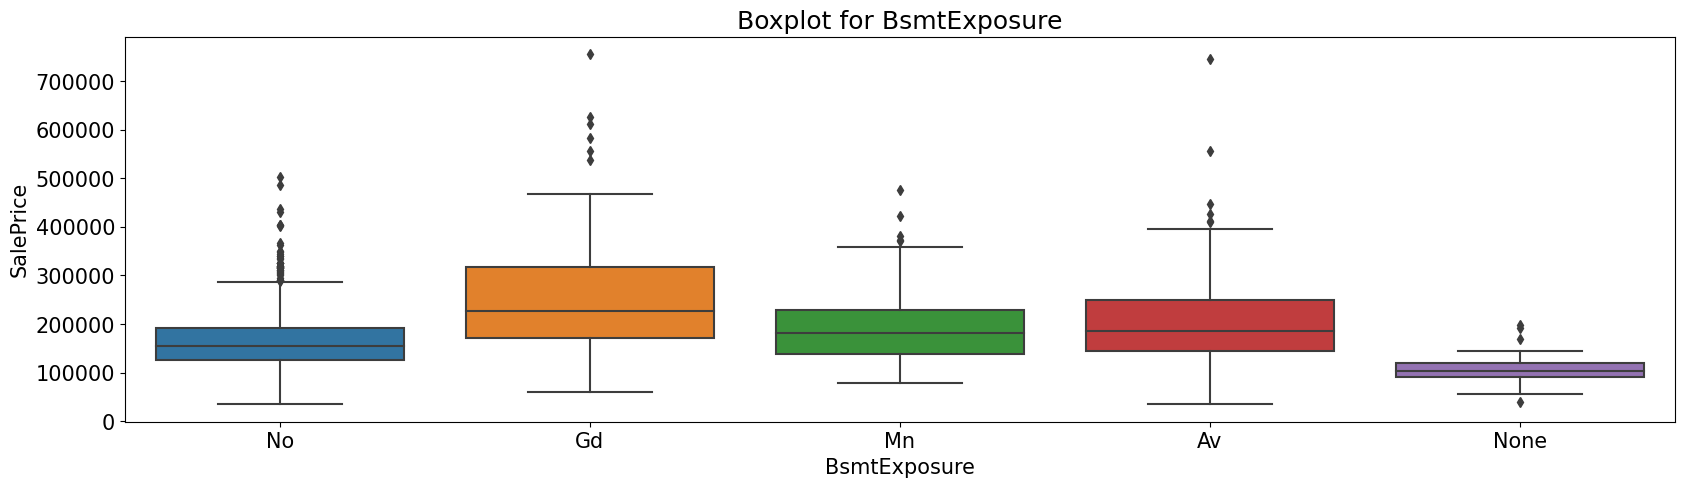

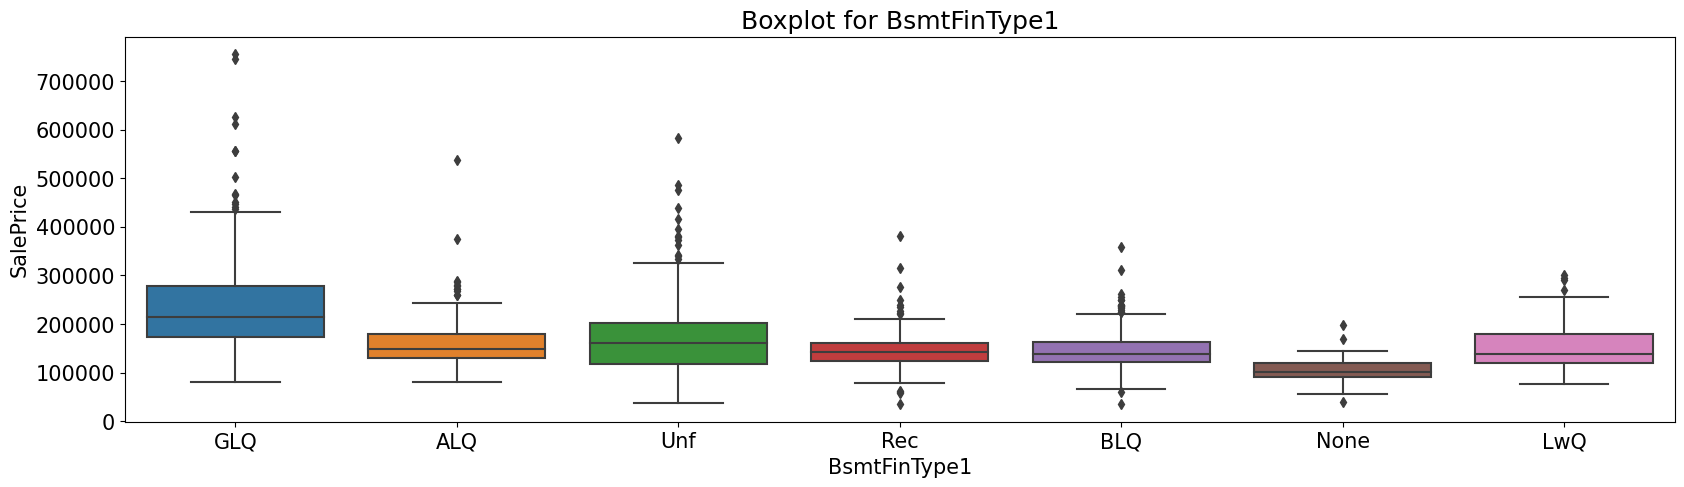

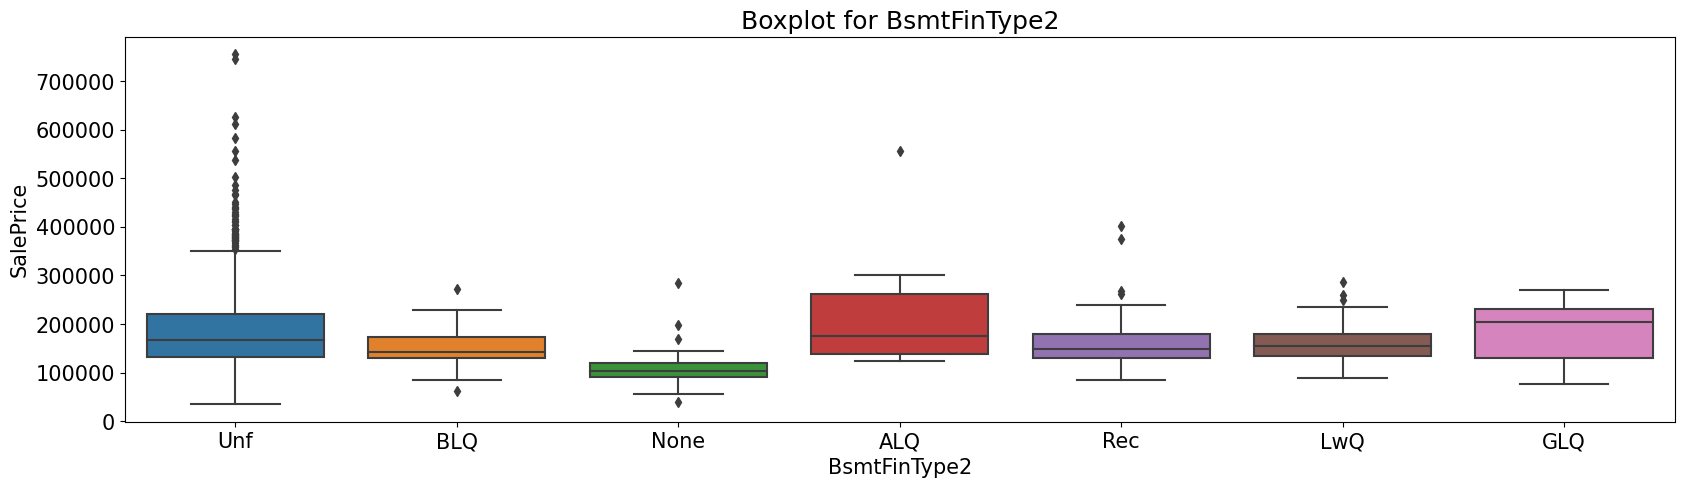

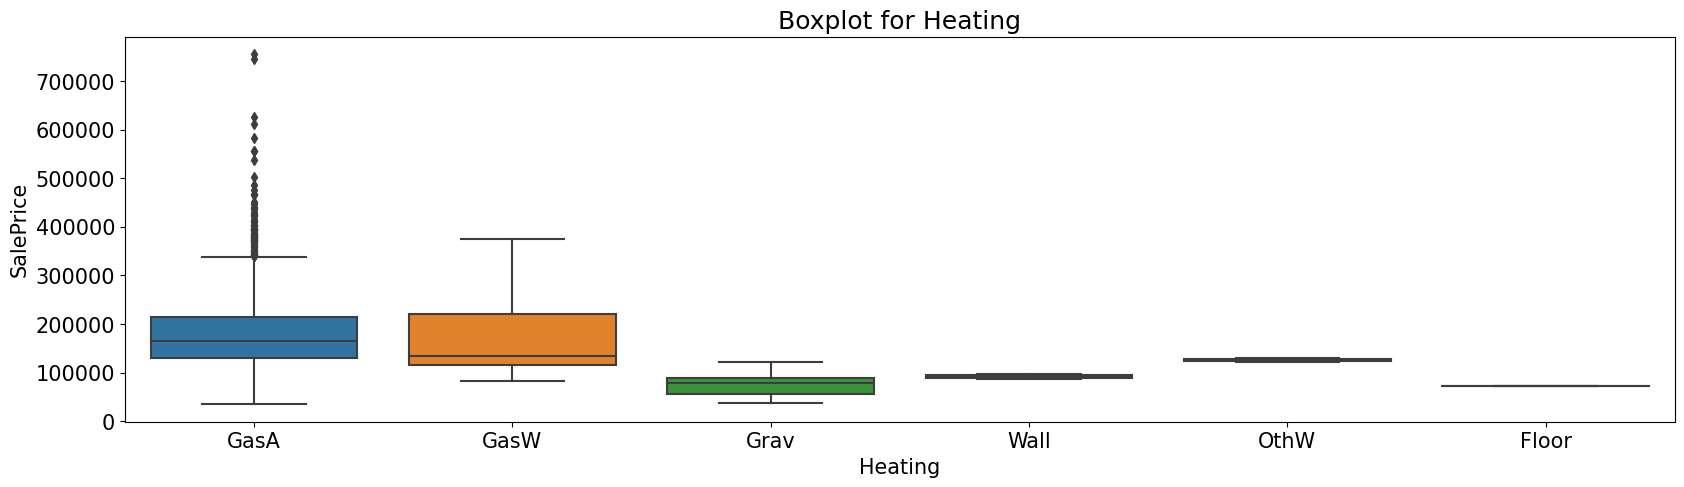

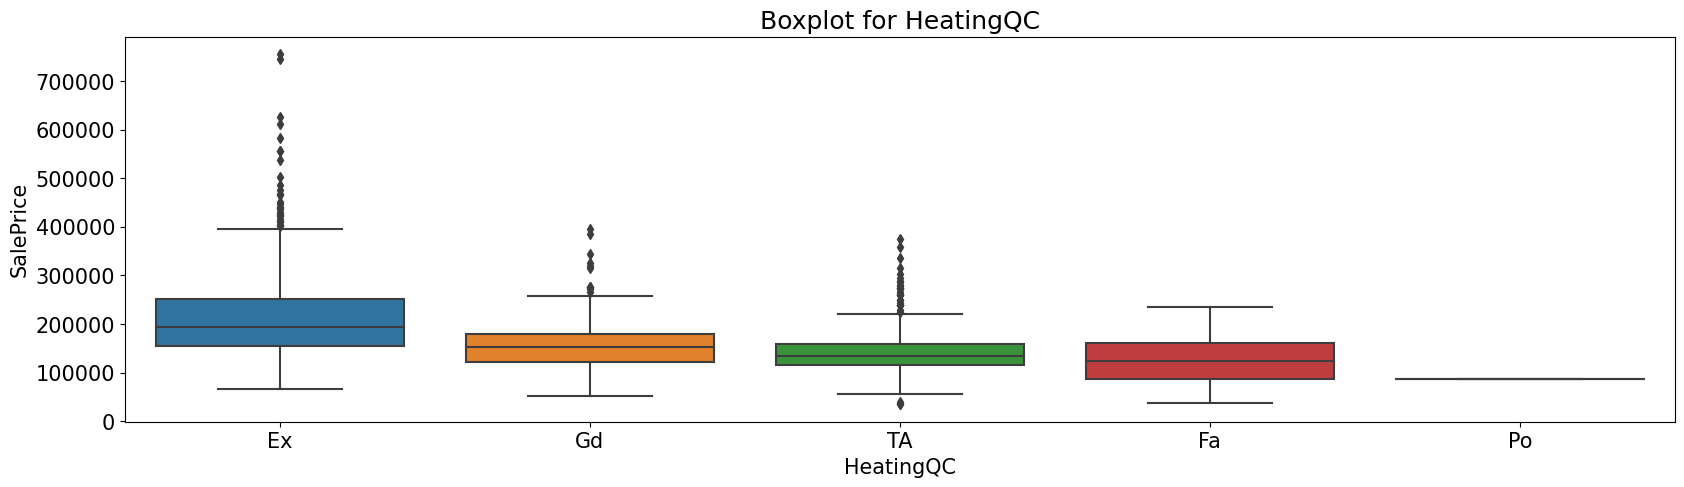

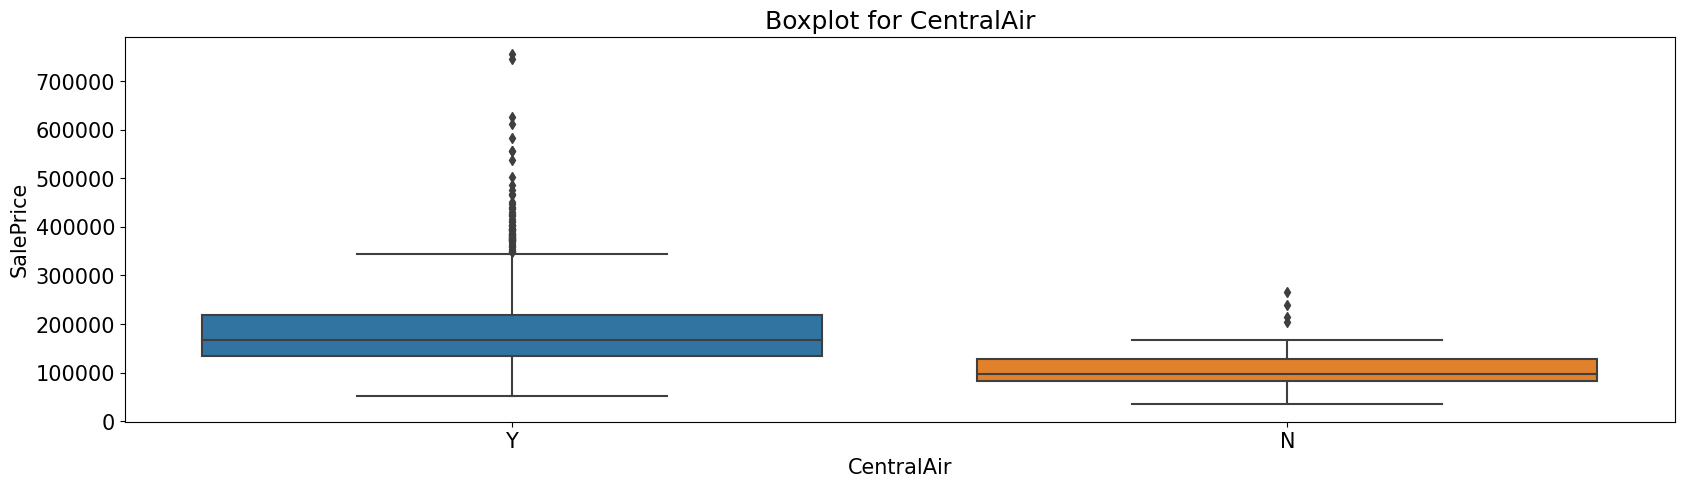

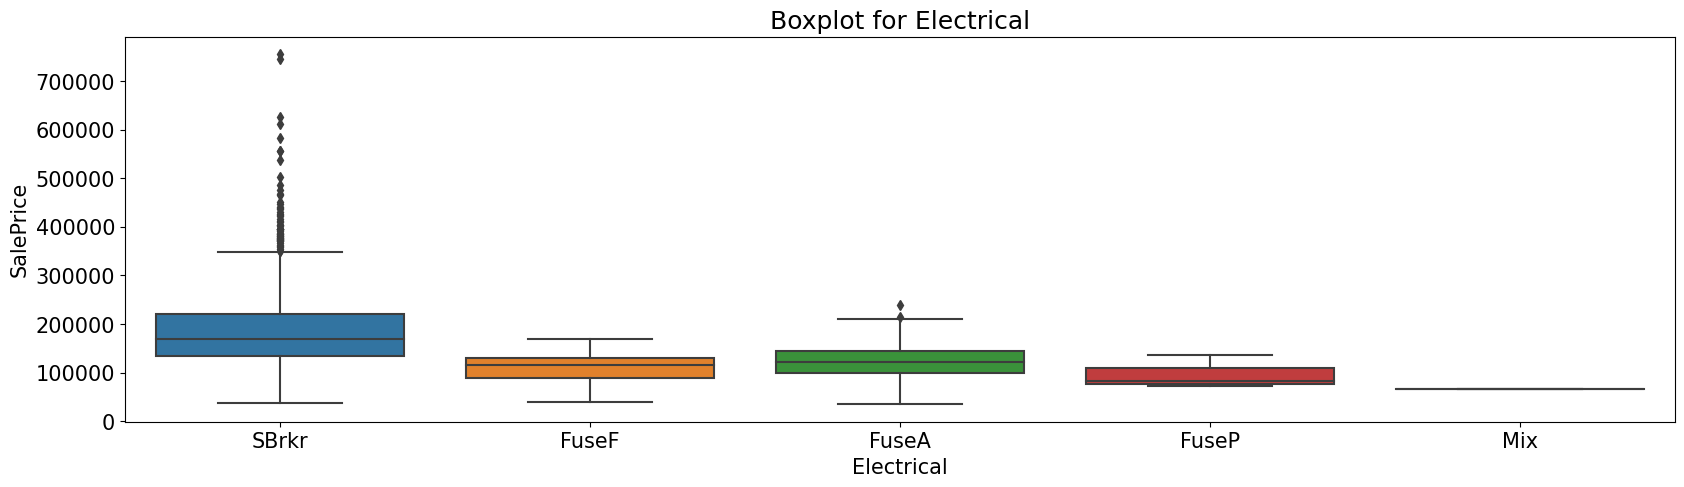

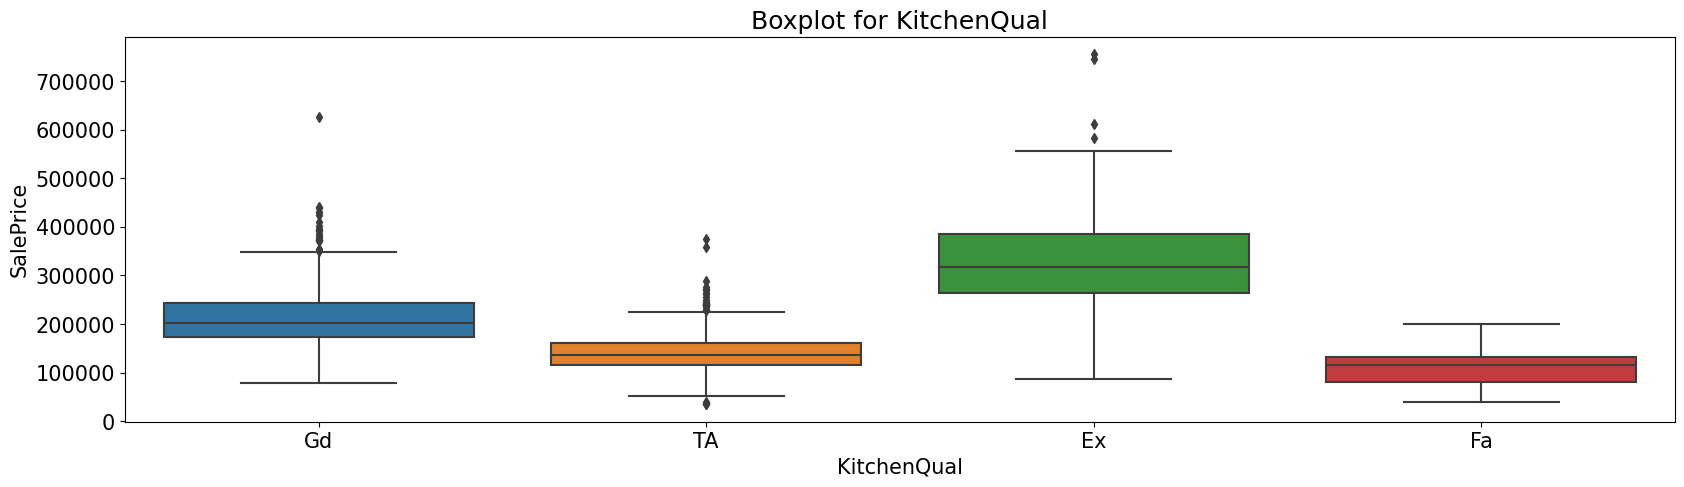

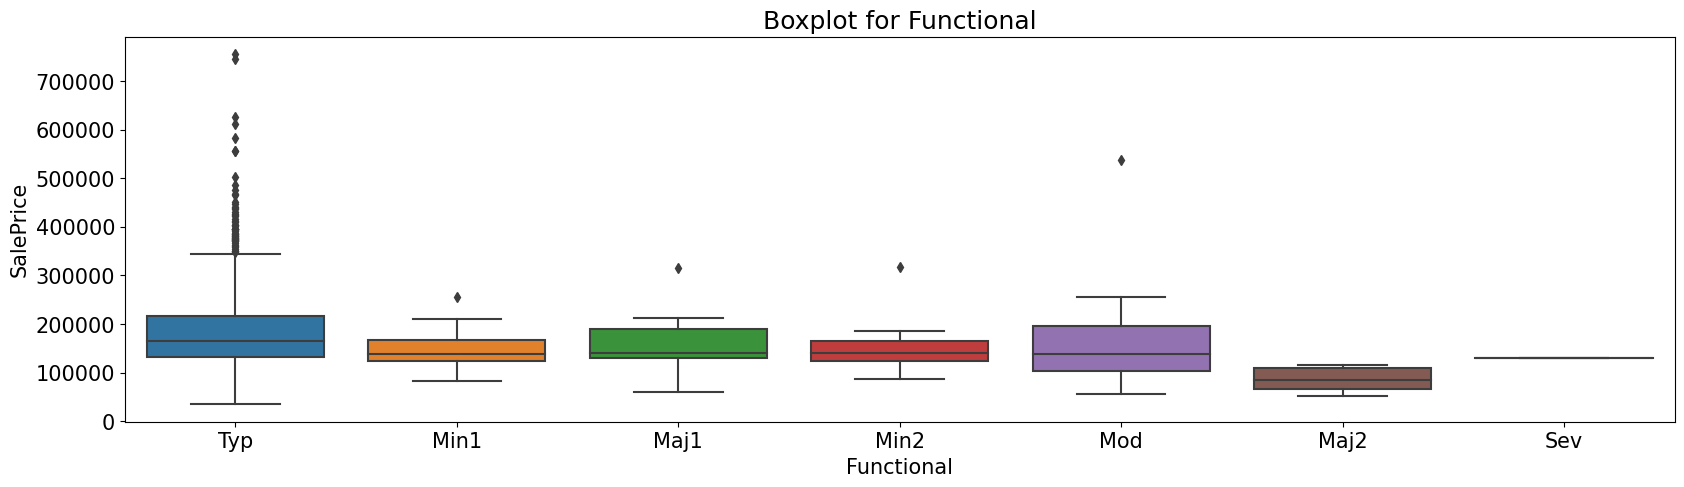

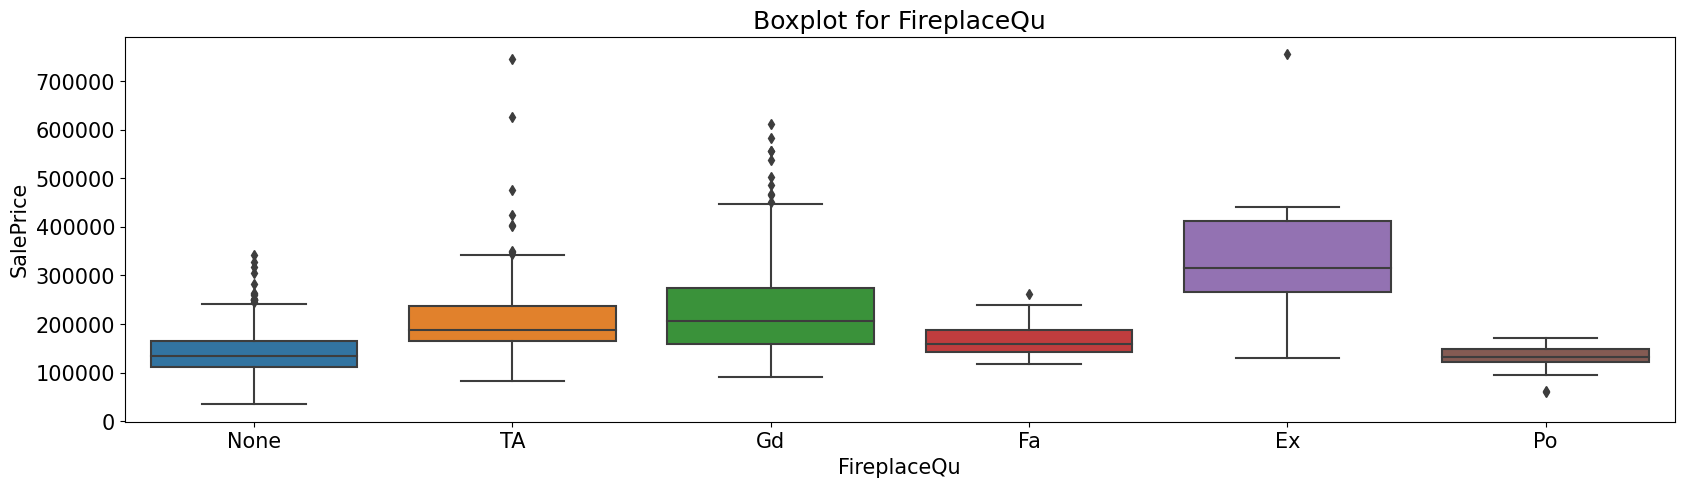

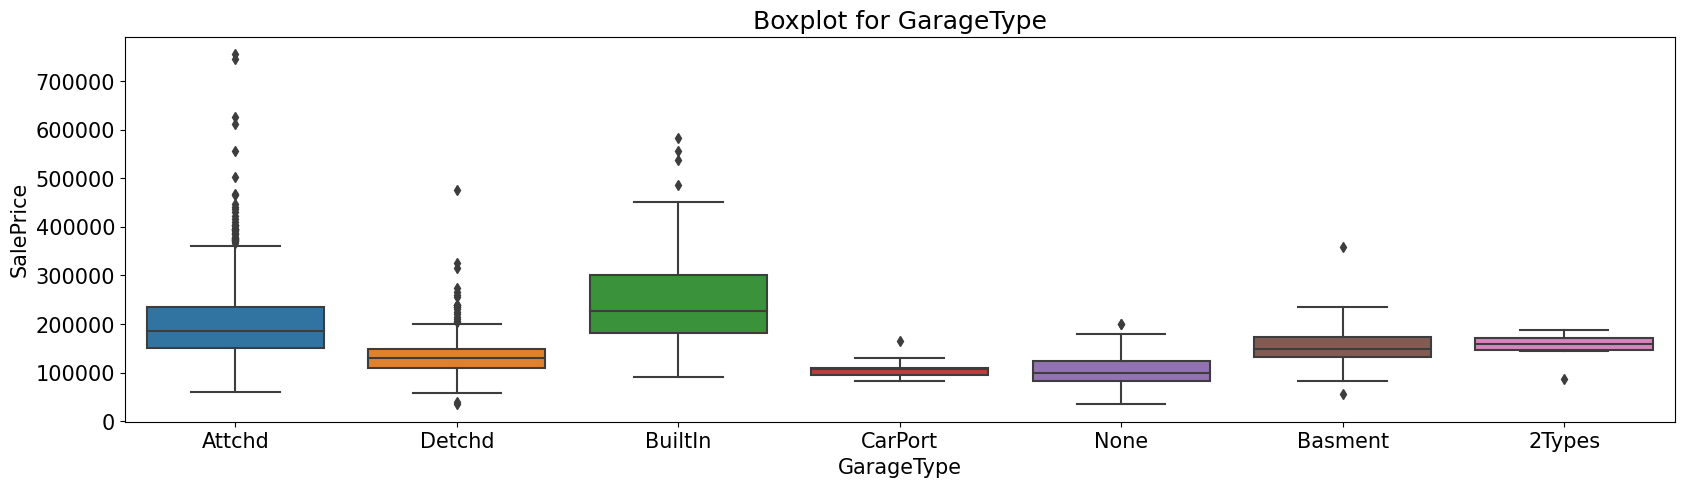

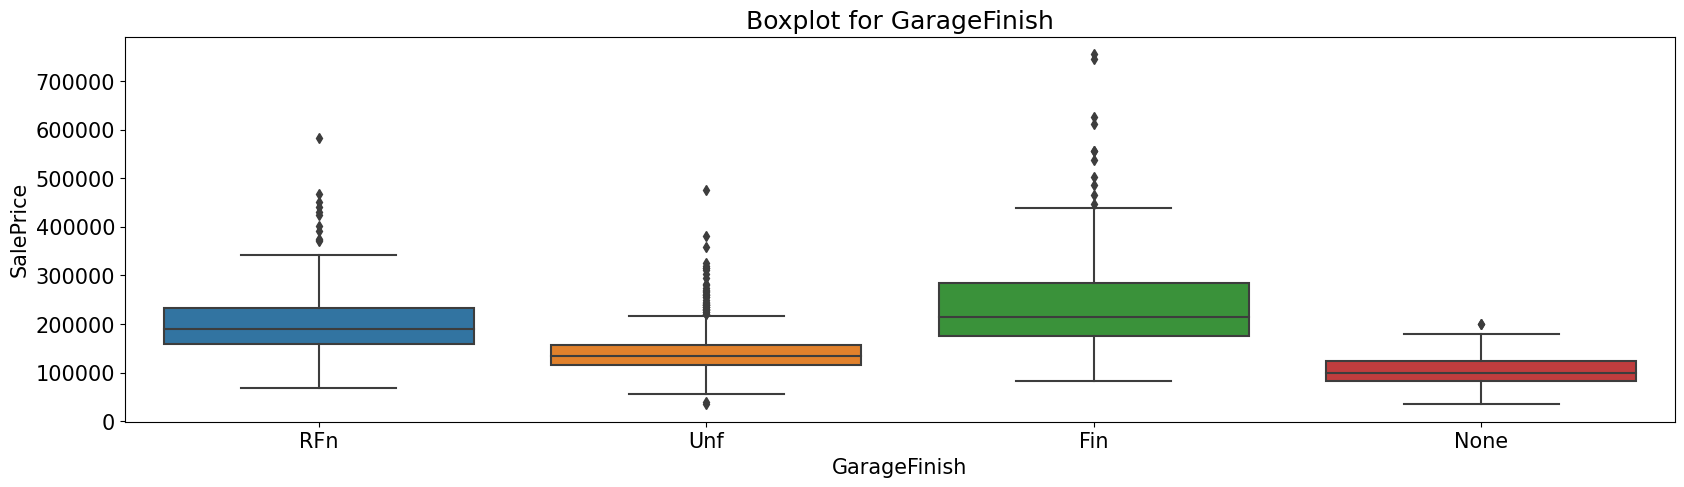

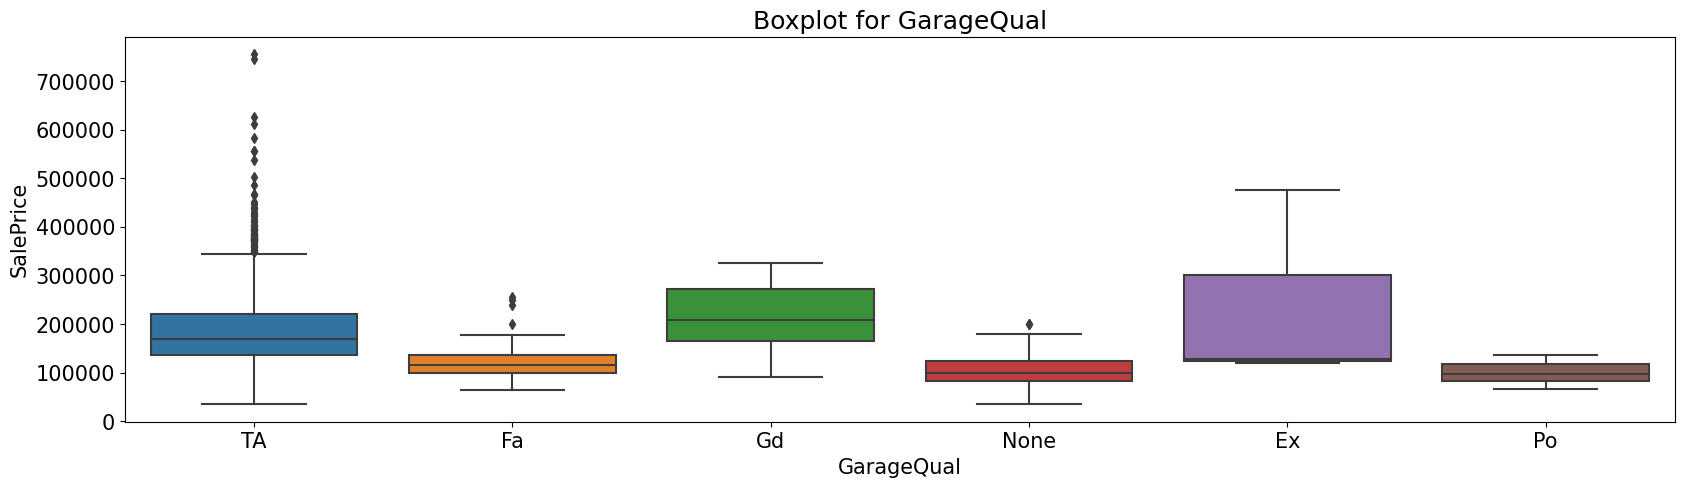

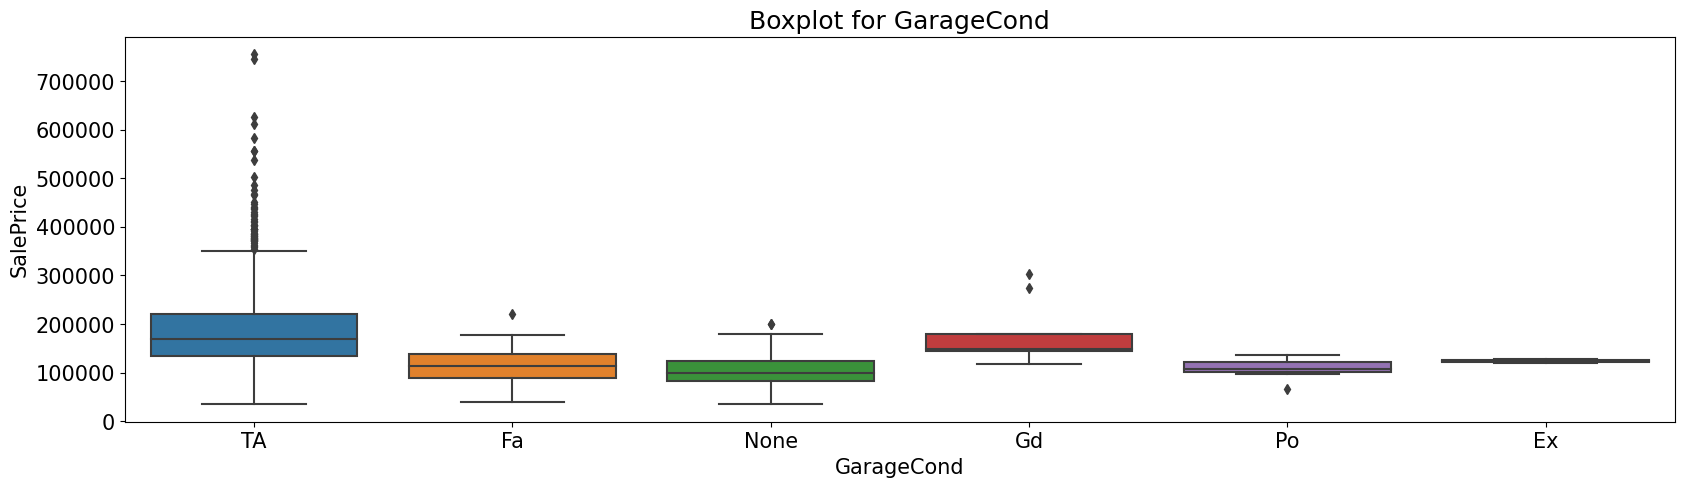

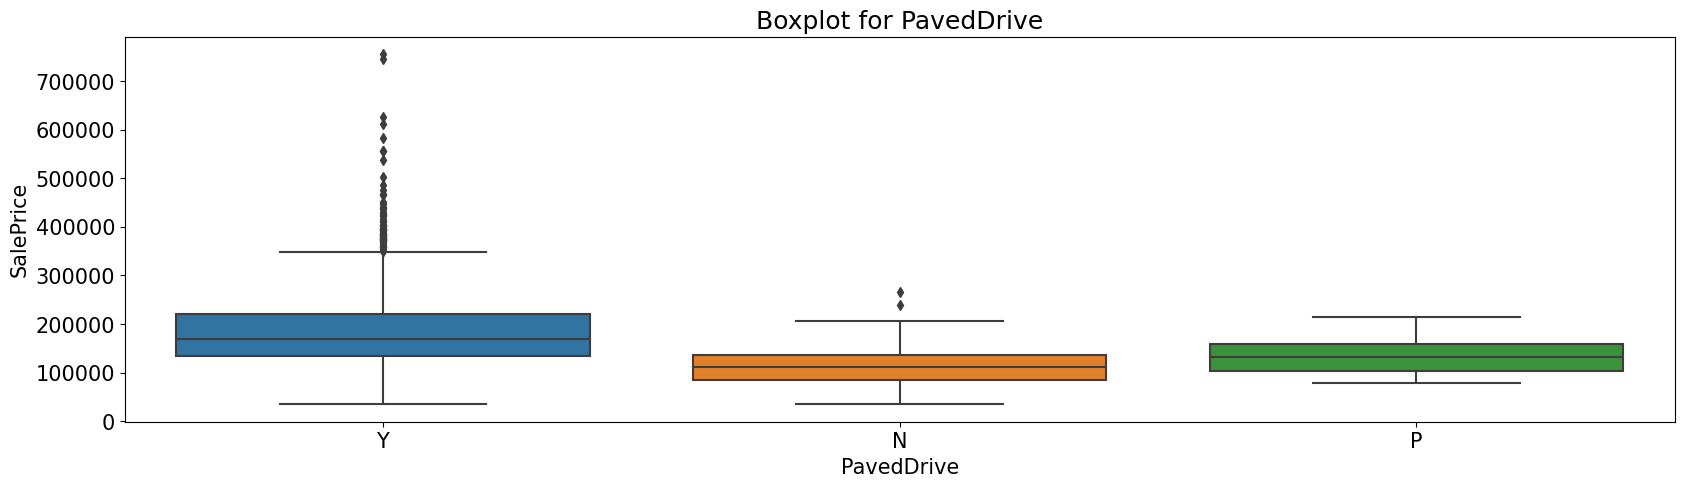

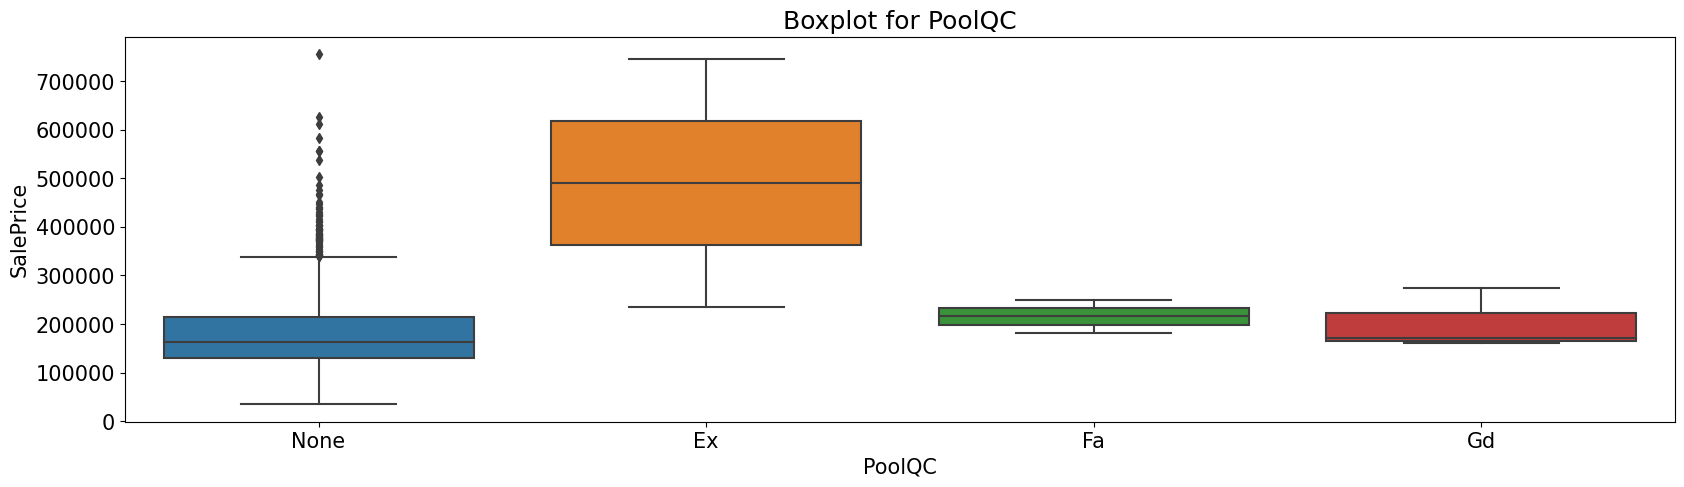

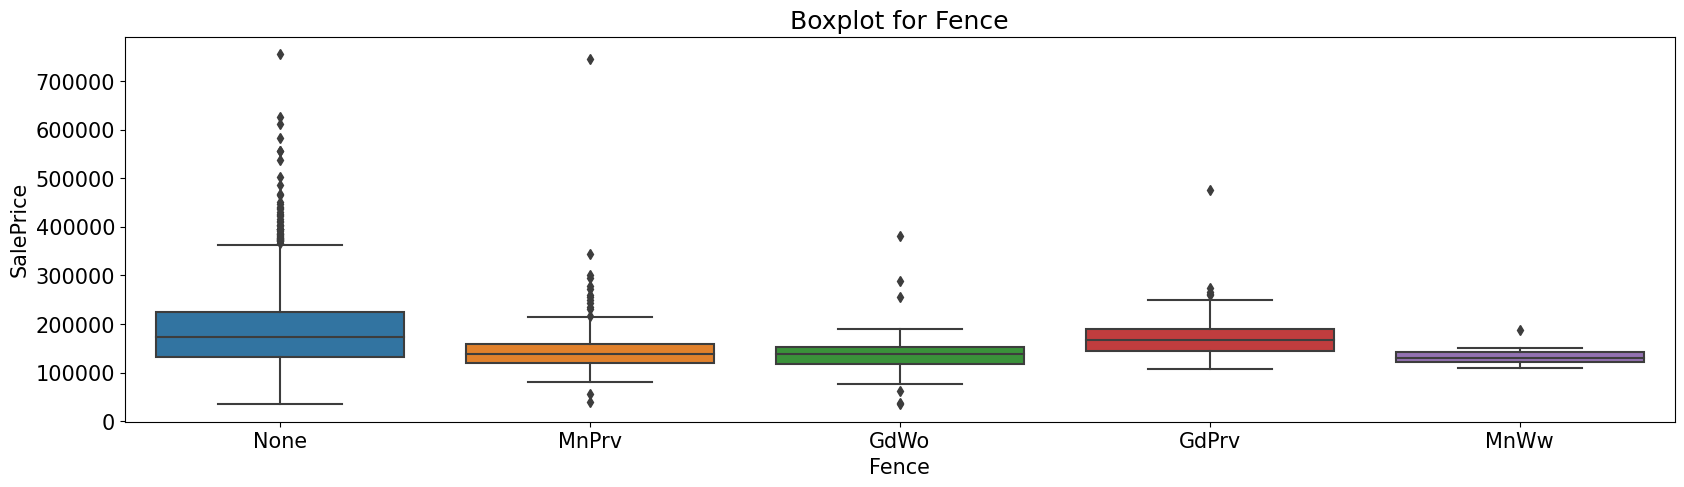

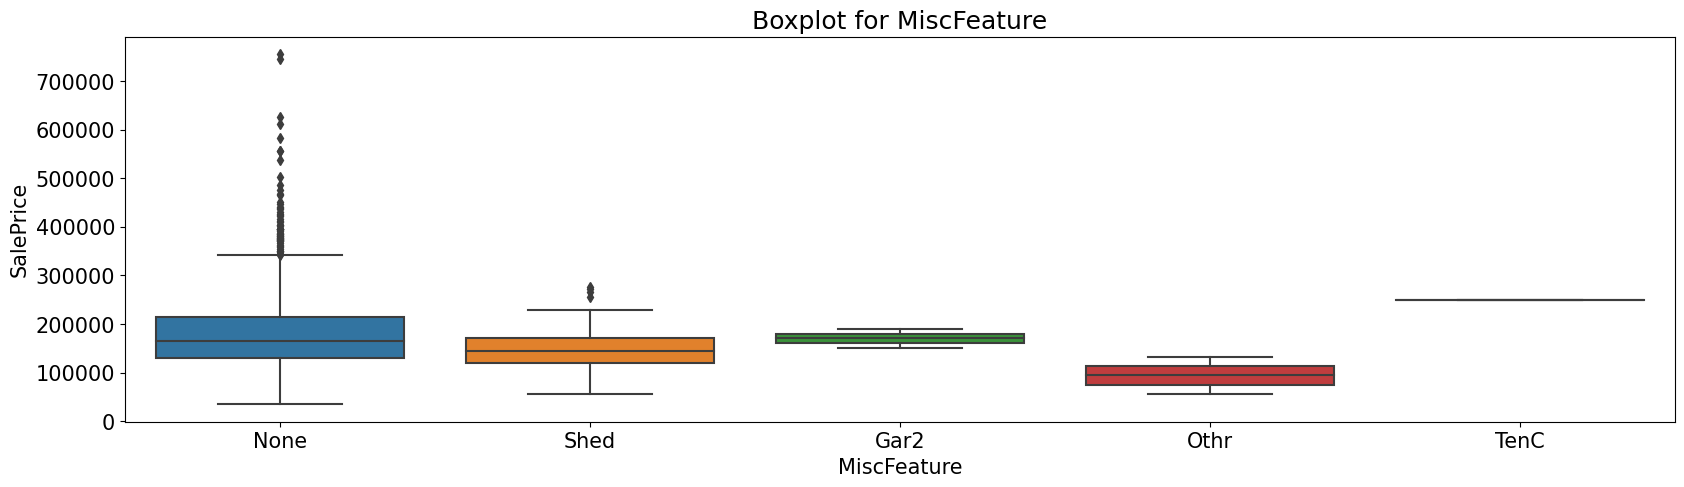

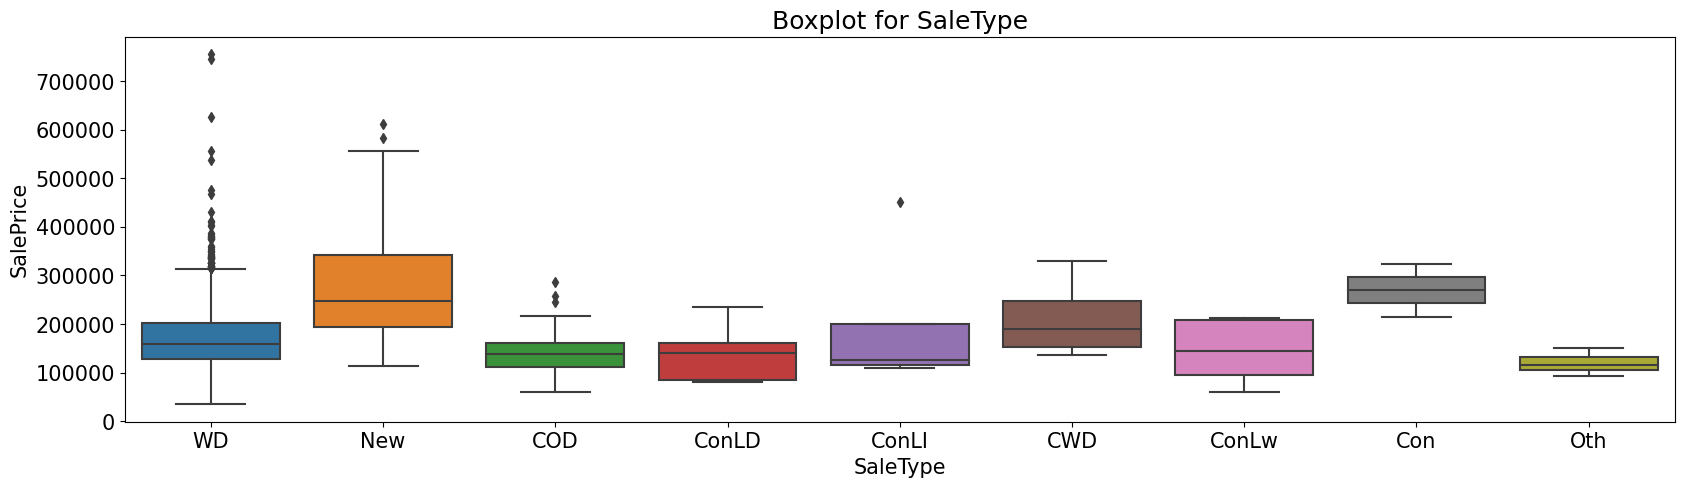

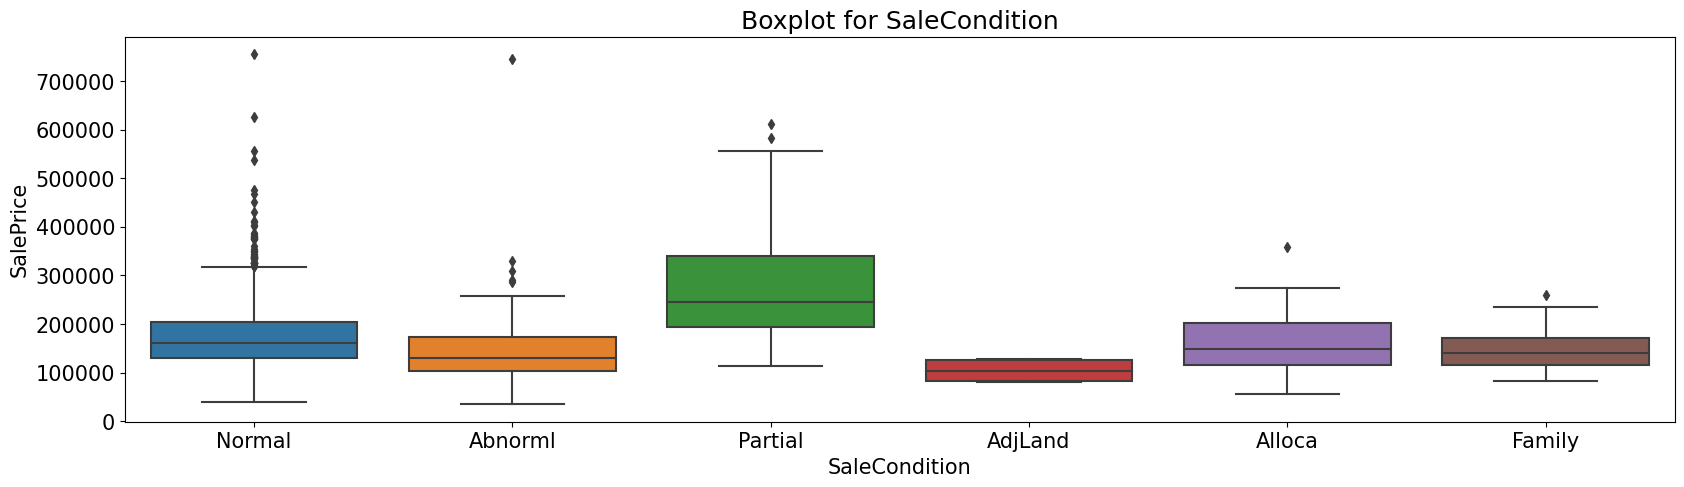

In [89]:
import seaborn as sns

for col in train_object .columns[:-1]:
    plt.subplots(figsize=(20,5))
    sns.boxplot(x=col, y="SalePrice", data=train_object )
    plt.title('Boxplot for {}'.format(col))
    plt.show()

In [101]:
train_object.groupby(['MSZoning'])[["SalePrice"]].agg(['mean','median','count'])

SalePrice                
                   mean    median count
MSZoning                               
C (all)    74528.000000   74700.0    10
FV        214014.061538  205950.0    65
RH        131558.375000  136500.0    16
RL        191004.994787  174000.0  1151
RM        126316.830275  120500.0   218

In [130]:

test= []
for col in train_object.columns:
    data = train_object.groupby([col])[["SalePrice"]].agg(['mean','median','count'])
    sort_data = data.sort_values(data.columns[1],ascending = True)
    print(sort_data)
    print(sort_data.index[0])
    var_name = {}
    for i in range(len(sort_data)):
        var_name[sort_data.index[i]] = i
    test.append(var_name) 

# for col in train_object .columns[:-1]:
#     plt.subplots(figsize=(20,5))
#     sns.boxplot(x=col, y="SalePrice", data=train_object )
#     plt.title('Boxplot for {}'.format(col))
#     plt.show()

              SalePrice                
                   mean    median count
MSZoning                               
C (all)    74528.000000   74700.0    10
RM        126316.830275  120500.0   218
RH        131558.375000  136500.0    16
RL        191004.994787  174000.0  1151
FV        214014.061538  205950.0    65
C (all)
            SalePrice                
                 mean    median count
Street                               
Grvl    130190.500000  114250.0     6
Pave    181130.538514  163000.0  1454
Grvl
           SalePrice                
                mean    median count
Alley                               
Grvl   122219.080000  119500.0    50
None   183452.131483  165000.0  1369
Pave   168000.585366  172500.0    41
Grvl
              SalePrice                
                   mean    median count
LotShape                               
Reg       164754.818378  146000.0   925
IR1       206101.665289  189000.0   484
IR3       216036.500000  203570.0    10
IR2       

In [133]:
test[0]

{'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

In [138]:
len(object_feature.columns)

42

In [143]:
for i in range(len(object_feature.columns)):
#for i in range(1):
    if(i==0):
        new_object_feature = object_feature.replace({object_feature.columns[i]:test[i]})
    else:
        new_object_feature = new_object_feature.replace({object_feature.columns[i]:test[i]})


In [144]:
new_object_feature

MSZoning  Street  Alley  LotShape  LandContour  LotConfig  LandSlope  \
Id                                                                           
1            3       1      1         0            1          0          0   
2            3       1      1         0            1          2          0   
3            3       1      1         1            1          0          0   
4            3       1      1         1            1          1          0   
5            3       1      1         1            1          2          0   
...        ...     ...    ...       ...          ...        ...        ...   
2915         1       1      1         0            1          0          0   
2916         1       1      1         0            1          0          0   
2917         3       1      1         0            1          0          0   
2918         3       1      1         0            1          0          0   
2919         3       1      1         0            1          0          2   

      Neighborhood  Condition1  Condition2  ...  GarageType  GarageFinish  \
Id                                          ...                             
1               16           3           4  ...           5             2   
2               19           1           4  ...           5             2   
3               16           3           4  ...           5             2   
4               18           3           4  ...           2             1   
5               23           3           4  ...           5             2   
...            ...         ...         ...  ...         ...           ...   
2915             0           3           4  ...           0             0   
2916             0           3           4  ...           1             1   
2917            11           3           4  ...           2             1   
2918            11           3           4  ...           0             0   
2919            11           3           4  ...           5             3   

      GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  \
Id                                                                     
1              4           5           2       0      4            2   
2              4           5           2       0      4            2   
3              4           5           2       0      4            2   
4              4           5           2       0      4            2   
5              4           5           2       0      4            2   
...          ...         ...         ...     ...    ...          ...   
2915           1           0           2       0      4            2   
2916           4           5           2       0      4            2   
2917           4           5           2       0      4            2   
2918           1           0           2       0      1            1   
2919           4           5           2       0      4            2   

      SaleType  SaleCondition  
Id                             
1            5              4  
2            5              4  
3            5              4  
4            5              1  
5            5              4  
...        ...            ...  
2915         5              4  
2916         5              1  
2917         5              1  
2918         5              4  
2919         5              4  

[2919 rows x 42 columns]

In [145]:
classification_int_float = ["MSSubClass","OverallQual","OverallCond"]
int_float_feature = all_data[all_data.dtypes[all_data.dtypes != object].index]
all_int_float = int_float_feature.drop(classification_int_float,axis = 1)
train_int_float = all_int_float[:len(train_data)]
train_int_float["SalePrice"] = train_y
train_int_float

C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\1435443760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_int_float["SalePrice"] = train_y


LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                                                                            
1            65.0     8450       2003          2003       196.0       706.0   
2            80.0     9600       1976          1976         0.0       978.0   
3            68.0    11250       2001          2002       162.0       486.0   
4            60.0     9550       1915          1970         0.0       216.0   
5            84.0    14260       2000          2000       350.0       655.0   
...           ...      ...        ...           ...         ...         ...   
1456         62.0     7917       1999          2000         0.0         0.0   
1457         85.0    13175       1978          1988       119.0       790.0   
1458         66.0     9042       1941          2006         0.0       275.0   
1459         68.0     9717       1950          1996         0.0        49.0   
1460         75.0     9937       1965          1965         0.0       830.0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  WoodDeckSF  \
Id                                                  ...               
1            0.0      150.0        856.0       856  ...           0   
2            0.0      284.0       1262.0      1262  ...         298   
3            0.0      434.0        920.0       920  ...           0   
4            0.0      540.0        756.0       961  ...           0   
5            0.0      490.0       1145.0      1145  ...         192   
...          ...        ...          ...       ...  ...         ...   
1456         0.0      953.0        953.0       953  ...           0   
1457       163.0      589.0       1542.0      2073  ...         349   
1458         0.0      877.0       1152.0      1188  ...           0   
1459      1029.0        0.0       1078.0      1078  ...         366   
1460       290.0      136.0       1256.0      1256  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                            
1              61              0          0            0         0        0   
2               0              0          0            0         0        0   
3              42              0          0            0         0        0   
4              35            272          0            0         0        0   
5              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1456           40              0          0            0         0        0   
1457            0              0          0            0         0        0   
1458           60              0          0            0         0     2500   
1459            0            112          0            0         0        0   
1460           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
Id                               
1          2    2008     208500  
2          5    2007     181500  
3          9    2008     223500  
4          2    2006     140000  
5         12    2008     250000  
...      ...     ...        ...  
1456       8    2007     175000  
1457       2    2010     210000  
1458       5    2010     266500  
1459       4    2010     142125  
1460       6    2008     147500  

[1460 rows x 34 columns]

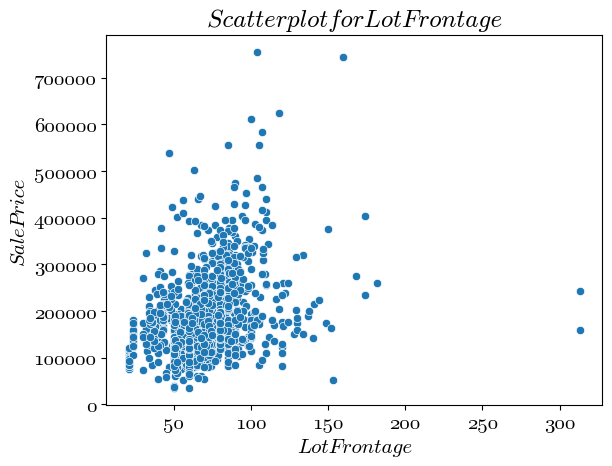

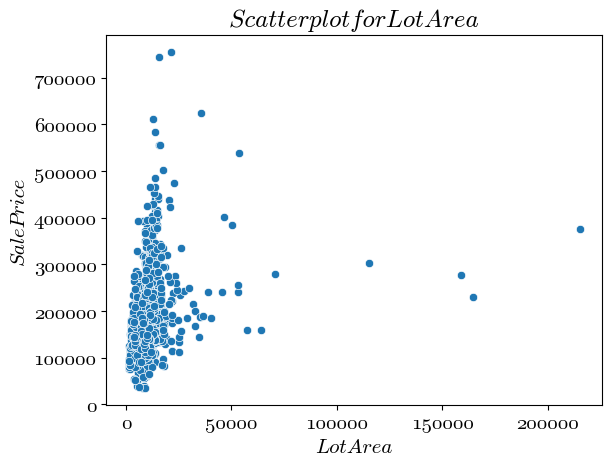

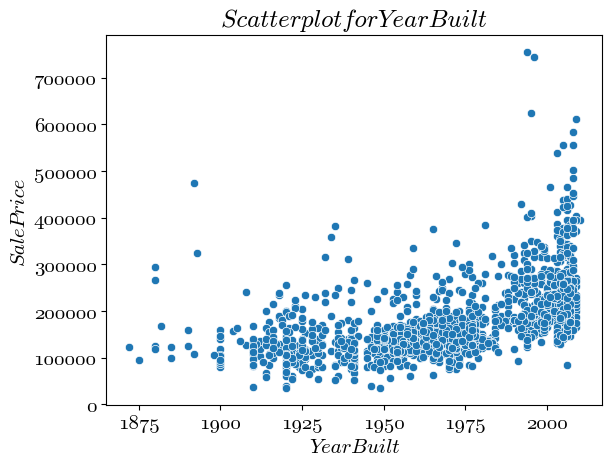

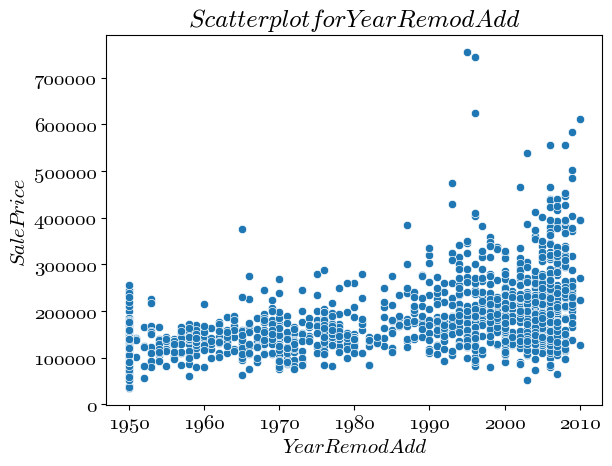

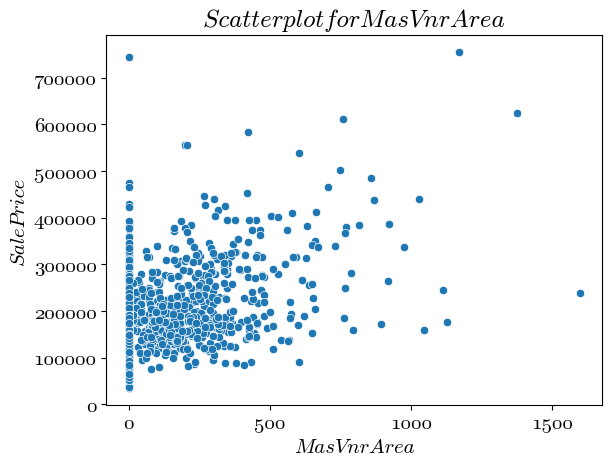

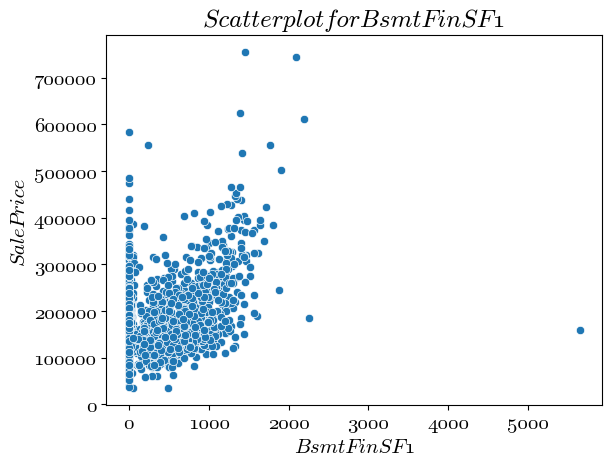

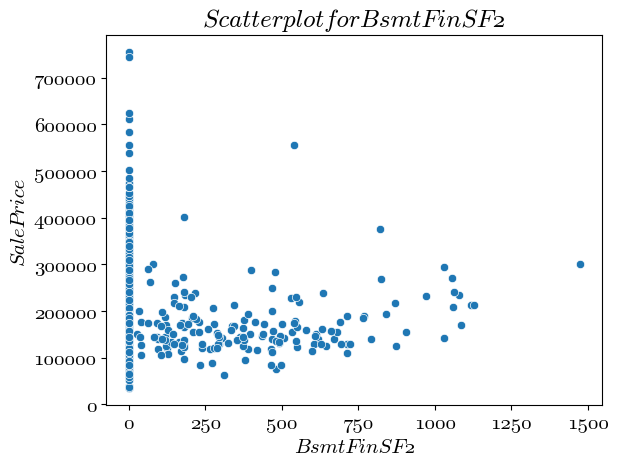

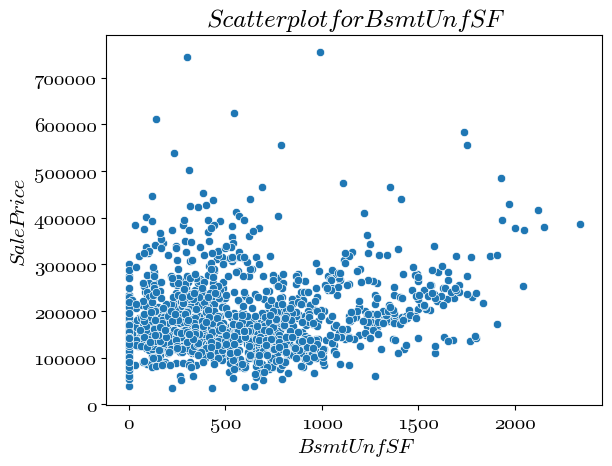

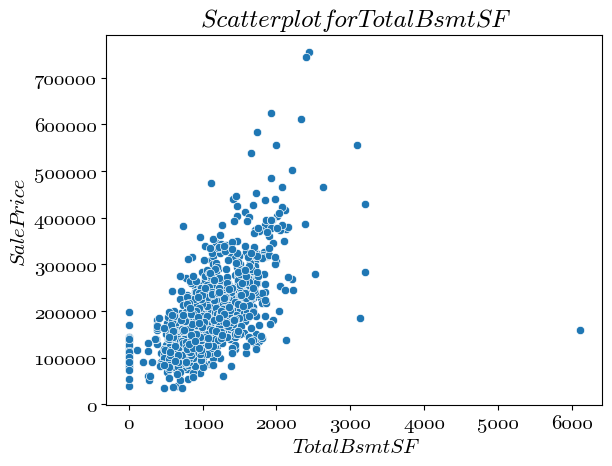

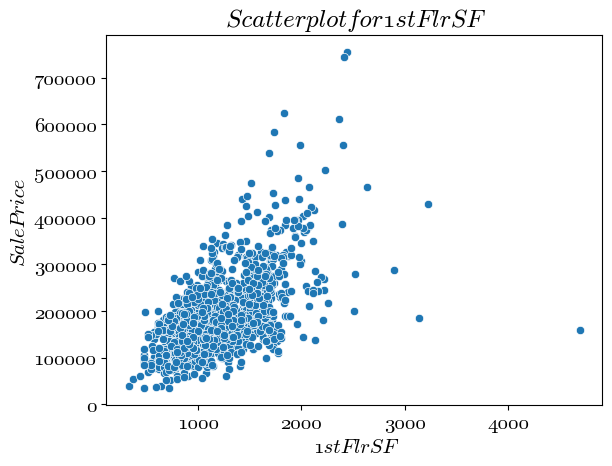

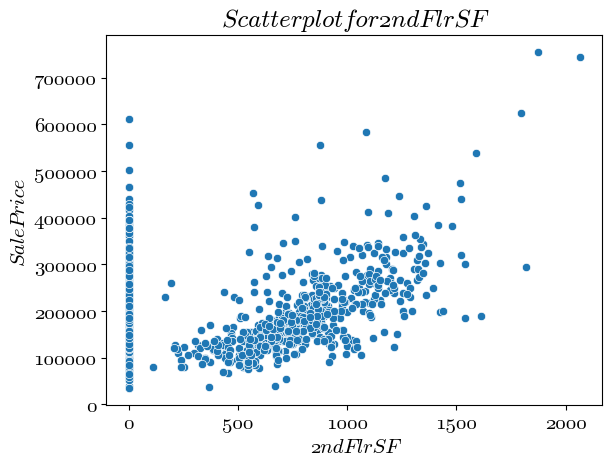

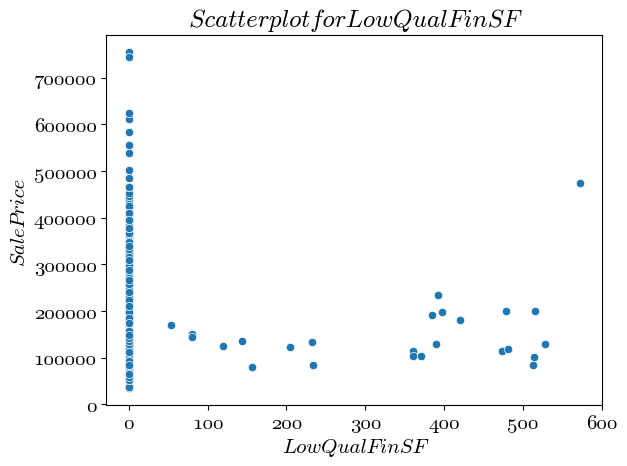

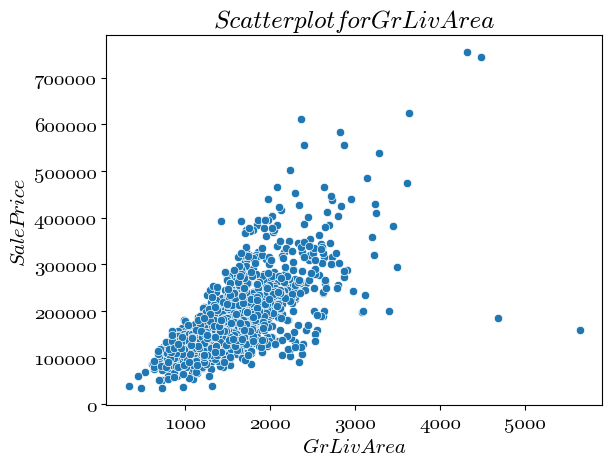

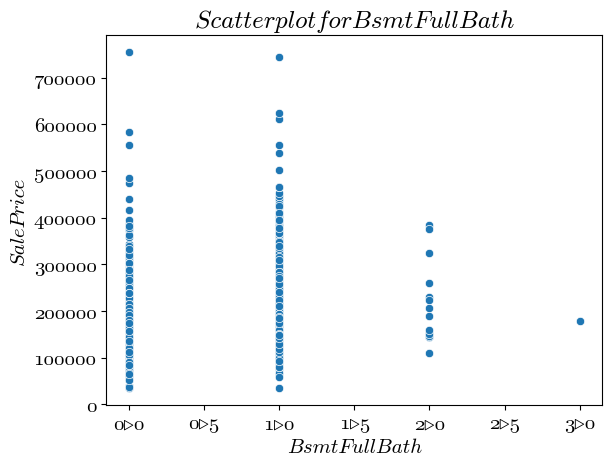

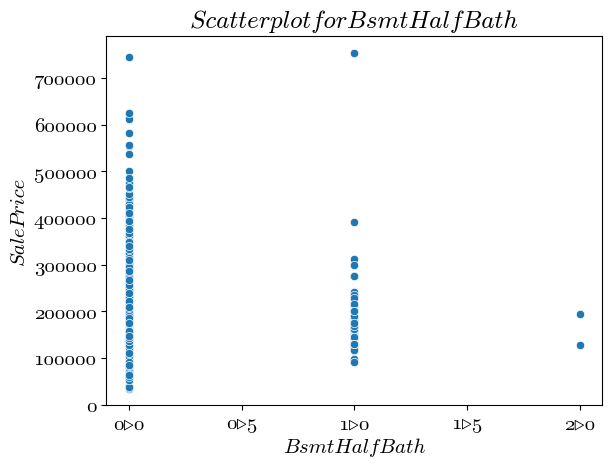

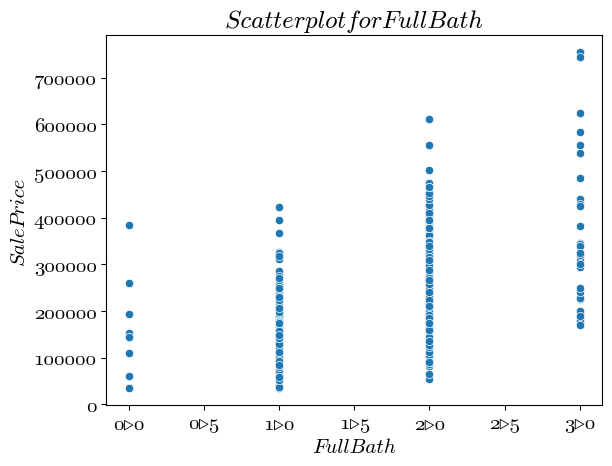

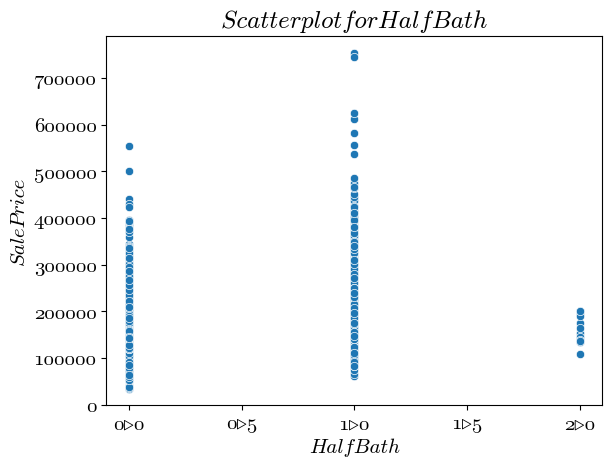

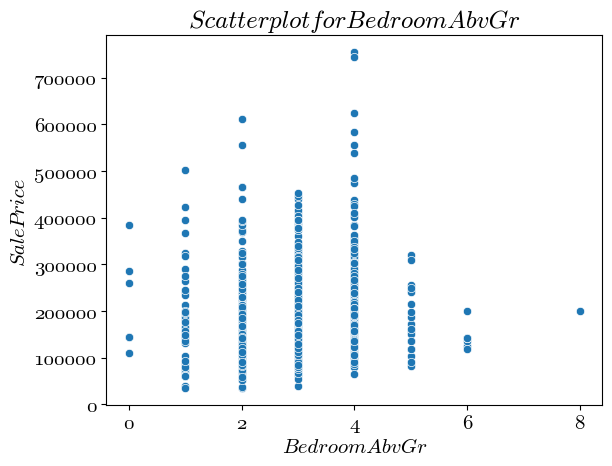

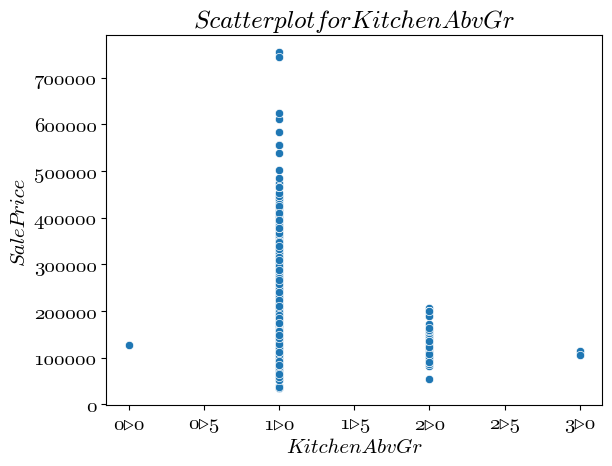

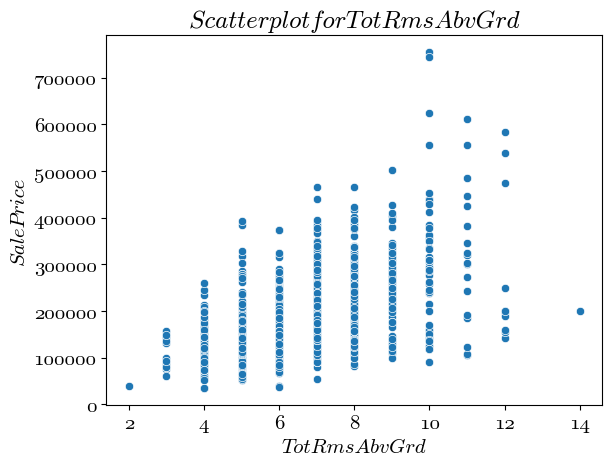

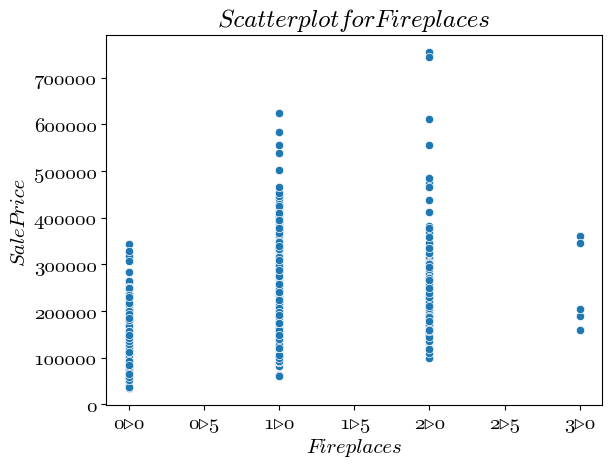

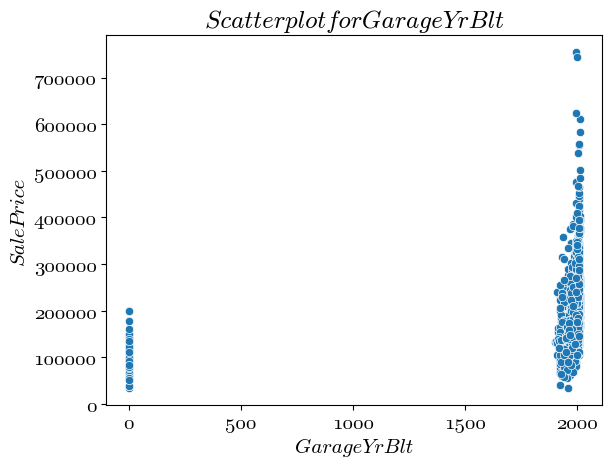

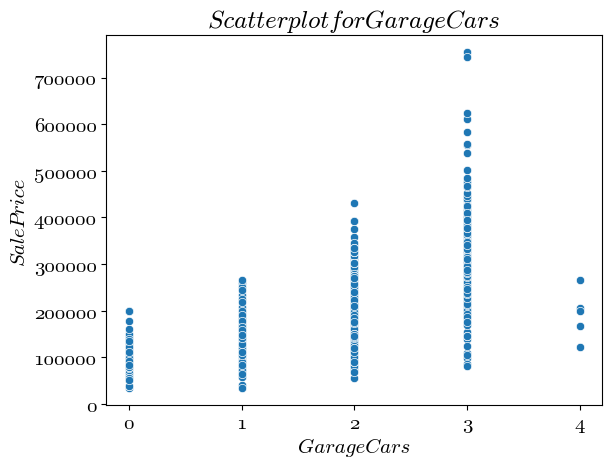

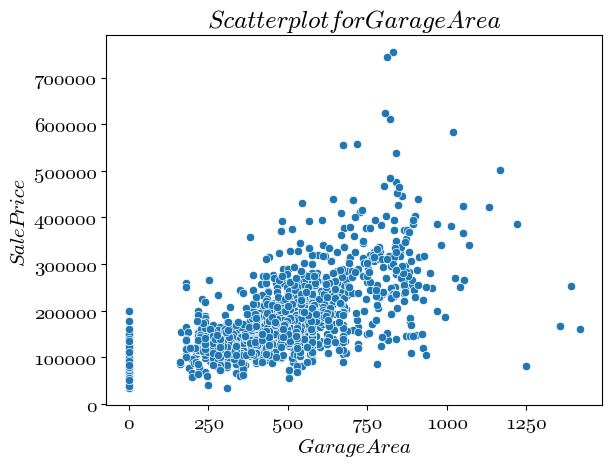

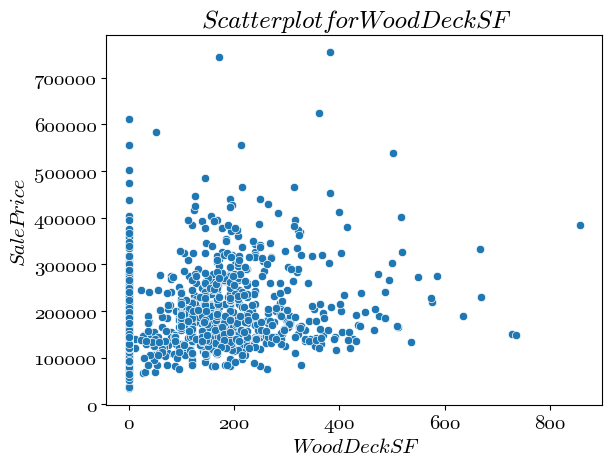

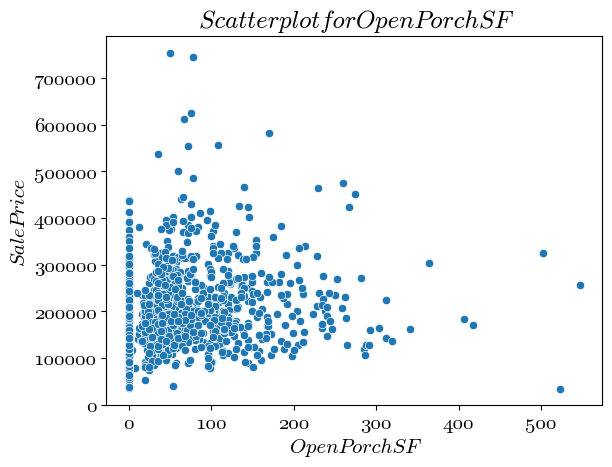

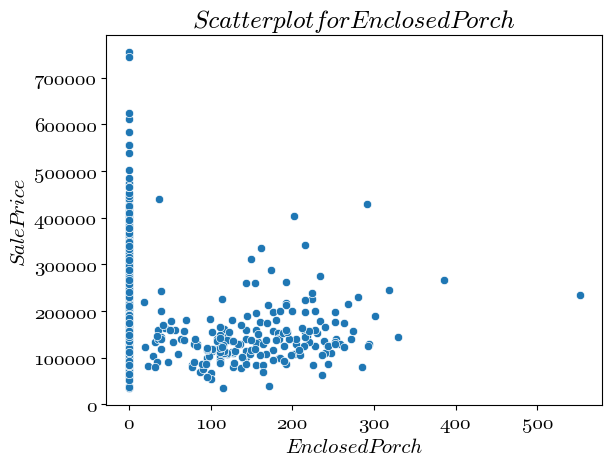

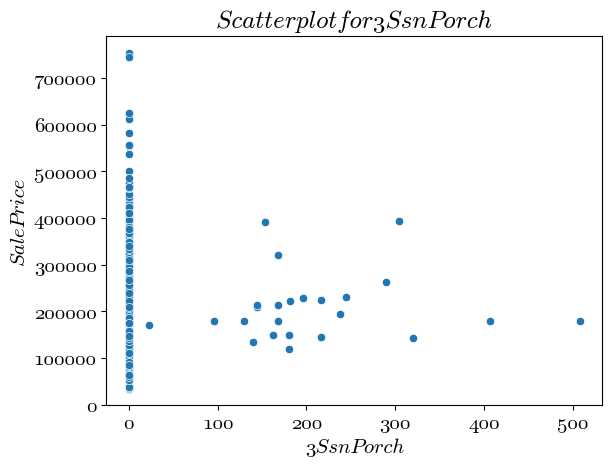

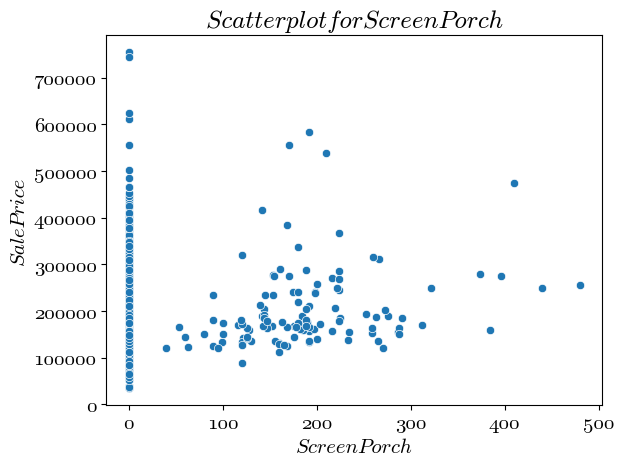

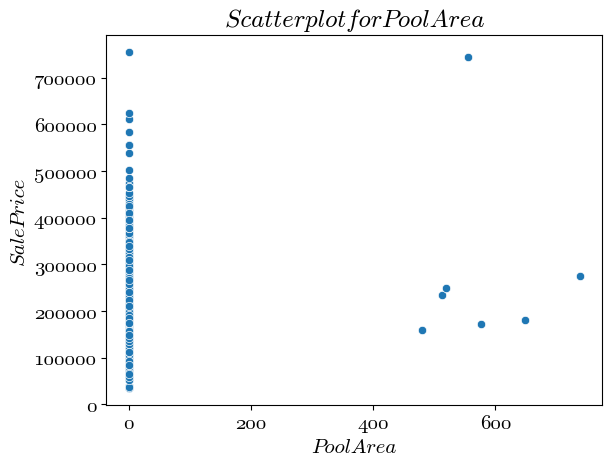

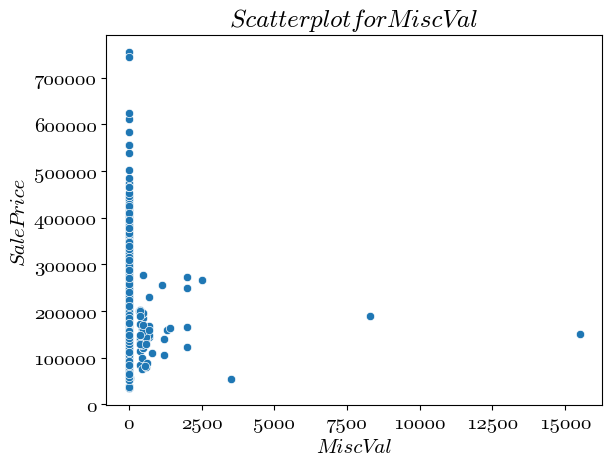

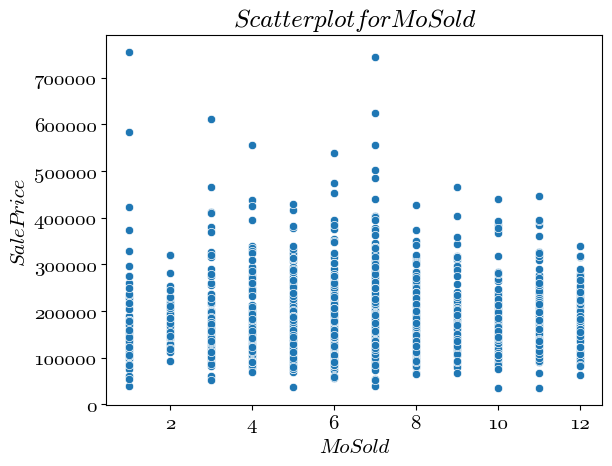

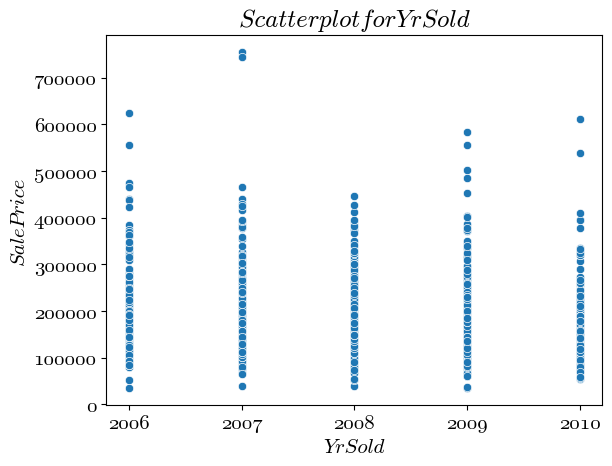

In [146]:
for col in train_int_float.columns[:-1]:
    sns.scatterplot(x=col, y='SalePrice', data=train_int_float)
    plt.title('Scatterplot for {}'.format(col))
    plt.show()

In [147]:
import numpy as np
log_all_int_float = np.log1p(all_int_float)
log_all_int_float

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                                                                             
1        4.189655  9.042040   7.602900      7.602900    5.283204    6.561031   
2        4.394449  9.169623   7.589336      7.589336    0.000000    6.886532   
3        4.234107  9.328212   7.601902      7.602401    5.093750    6.188264   
4        4.110874  9.164401   7.557995      7.586296    0.000000    5.379897   
5        4.442651  9.565284   7.601402      7.601402    5.860786    6.486161   
...           ...       ...        ...           ...         ...         ...   
2915     3.091042  7.568896   7.586296      7.586296    0.000000    0.000000   
2916     3.091042  7.546974   7.586296      7.586296    0.000000    5.533389   
2917     5.081404  9.903538   7.581210      7.599401    0.000000    7.110696   
2918     4.143135  9.253591   7.597396      7.597396    0.000000    5.823046   
2919     4.317488  9.172431   7.597898      7.598399    4.553877    6.632002   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageArea  \
Id                                                  ...               
1            0.0   5.017280     6.753438  6.753438  ...    6.308098   
2            0.0   5.652489     7.141245  7.141245  ...    6.133398   
3            0.0   6.075346     6.825460  6.825460  ...    6.411818   
4            0.0   6.293419     6.629363  6.869014  ...    6.466145   
5            0.0   6.196444     7.044033  7.044033  ...    6.729824   
...          ...        ...          ...       ...  ...         ...   
2915         0.0   6.304449     6.304449  6.304449  ...    0.000000   
2916         0.0   5.686975     6.304449  6.304449  ...    5.659482   
2917         0.0   0.000000     7.110696  7.110696  ...    6.357842   
2918         0.0   6.356108     6.816736  6.878326  ...    0.000000   
2919         0.0   5.476464     6.904751  6.904751  ...    6.478510   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                     
1       0.000000     4.127134       0.000000        0.0          0.0   
2       5.700444     0.000000       0.000000        0.0          0.0   
3       0.000000     3.761200       0.000000        0.0          0.0   
4       0.000000     3.583519       5.609472        0.0          0.0   
5       5.262690     4.442651       0.000000        0.0          0.0   
...          ...          ...            ...        ...          ...   
2915    0.000000     0.000000       0.000000        0.0          0.0   
2916    0.000000     3.218876       0.000000        0.0          0.0   
2917    6.163315     0.000000       0.000000        0.0          0.0   
2918    4.394449     3.496508       0.000000        0.0          0.0   
2919    5.252273     3.891820       0.000000        0.0          0.0   

      PoolArea   MiscVal    MoSold    YrSold  
Id                                            
1          0.0  0.000000  1.098612  7.605392  
2          0.0  0.000000  1.791759  7.604894  
3          0.0  0.000000  2.302585  7.605392  
4          0.0  0.000000  1.098612  7.604396  
5          0.0  0.000000  2.564949  7.605392  
...        ...       ...       ...       ...  
2915       0.0  0.000000  1.945910  7.604396  
2916       0.0  0.000000  1.609438  7.604396  
2917       0.0  0.000000  2.302585  7.604396  
2918       0.0  6.552508  2.079442  7.604396  
2919       0.0  0.000000  2.484907  7.604396  

[2919 rows x 33 columns]

In [148]:
classificantion_feature = int_float_feature[classification_int_float]
classificantion_feature_train = classificantion_feature[:len(train)]
classificantion_feature_train["SalePrice"] = train_y
 
for col in classificantion_feature_train.columns:
    data = classificantion_feature_train.groupby([col])[["SalePrice"]].agg(['mean','median','count'])
    sort_data = data.sort_values(data.columns[1],ascending = True)
    print(sort_data)

                SalePrice                
                     mean    median count
MSSubClass                               
180         102300.000000   88500.0    10
30           95829.724638   99900.0    69
45          108591.666667  107500.0    12
190         129613.333333  128250.0    30
50          143302.972222  132000.0   144
90          133541.076923  135980.0    52
85          147810.000000  140750.0    20
40          156125.000000  142500.0     4
160         138647.380952  146000.0    63
70          166772.416667  156000.0    60
20          185224.811567  159250.0   536
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
120         200779.080460  192000.0    87
60          239948.501672  215200.0   299
                 SalePrice                
                      mean    median count
OverallQual                               
1             50150.000000   50150.0     2
2             51770.333333   60000.0     3
3             87473.750000   

C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\3922646433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classificantion_feature_train["SalePrice"] = train_y


In [149]:
MSSubClass_dict = {180:1,30:1,45:1,190:1,
                  50:2,90:2,85:2,40:2,160:2,
                  70:3,20:3,
                   75:4,80:4,
                  120:5,60:5,
                  150:0}
#-------------------------------------------------------
OverallCond_dict = {1:1,
                   2:2,3:2,
                   4:3,
                   8:4,6:4,7:4,
                   9:5,5:5}

In [150]:
classificantion_feature["MSSubClass"] =classificantion_feature["MSSubClass"].map(MSSubClass_dict)
classificantion_feature["OverallCond"] = classificantion_feature["OverallCond"].map(OverallCond_dict)

C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\4069089298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classificantion_feature["MSSubClass"] =classificantion_feature["MSSubClass"].map(MSSubClass_dict)
C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\4069089298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classificantion_feature["OverallCond"] = classificantion_feature["OverallCond"].map(OverallCond_dict)


In [151]:
all_feature = pd.concat( [new_object_feature, log_all_int_float,classificantion_feature], axis=1 )
all_feature

MSZoning  Street  Alley  LotShape  LandContour  LotConfig  LandSlope  \
Id                                                                           
1            3       1      1         0            1          0          0   
2            3       1      1         0            1          2          0   
3            3       1      1         1            1          0          0   
4            3       1      1         1            1          1          0   
5            3       1      1         1            1          2          0   
...        ...     ...    ...       ...          ...        ...        ...   
2915         1       1      1         0            1          0          0   
2916         1       1      1         0            1          0          0   
2917         3       1      1         0            1          0          0   
2918         3       1      1         0            1          0          0   
2919         3       1      1         0            1          0          2   

      Neighborhood  Condition1  Condition2  ...  EnclosedPorch  3SsnPorch  \
Id                                          ...                             
1               16           3           4  ...       0.000000        0.0   
2               19           1           4  ...       0.000000        0.0   
3               16           3           4  ...       0.000000        0.0   
4               18           3           4  ...       5.609472        0.0   
5               23           3           4  ...       0.000000        0.0   
...            ...         ...         ...  ...            ...        ...   
2915             0           3           4  ...       0.000000        0.0   
2916             0           3           4  ...       0.000000        0.0   
2917            11           3           4  ...       0.000000        0.0   
2918            11           3           4  ...       0.000000        0.0   
2919            11           3           4  ...       0.000000        0.0   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSSubClass  \
Id                                                                      
1             0.0       0.0  0.000000  1.098612  7.605392           5   
2             0.0       0.0  0.000000  1.791759  7.604894           3   
3             0.0       0.0  0.000000  2.302585  7.605392           5   
4             0.0       0.0  0.000000  1.098612  7.604396           3   
5             0.0       0.0  0.000000  2.564949  7.605392           5   
...           ...       ...       ...       ...       ...         ...   
2915          0.0       0.0  0.000000  1.945910  7.604396           2   
2916          0.0       0.0  0.000000  1.609438  7.604396           2   
2917          0.0       0.0  0.000000  2.302585  7.604396           3   
2918          0.0       0.0  6.552508  2.079442  7.604396           2   
2919          0.0       0.0  0.000000  2.484907  7.604396           5   

      OverallQual  OverallCond  
Id                              
1               7            5  
2               6            4  
3               7            5  
4               7            5  
5               8            5  
...           ...          ...  
2915            4            4  
2916            4            5  
2917            5            4  
2918            5            5  
2919            7            5  

[2919 rows x 78 columns]

In [152]:
#將數據分割回原本的train data跟test data
train_x = all_feature[:len(train_data)]
test_x = all_feature[len(train_data):]
train_x.shape,test_x.shape

((1460, 78), (1459, 78))


 mu = 12.02 and sigma = 0.40



C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\162500121.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_y['SalePrice'] , fit=norm);


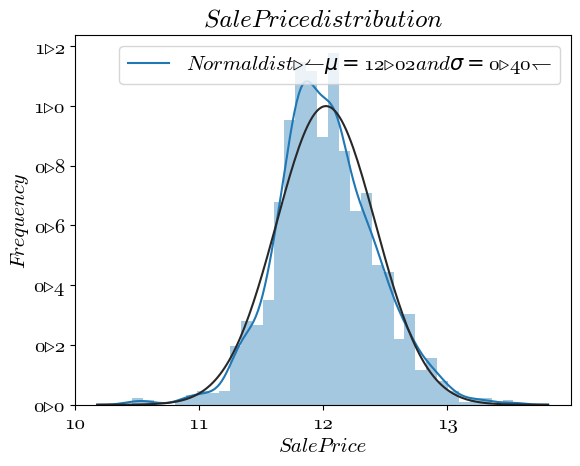

C:\Users\wayne\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


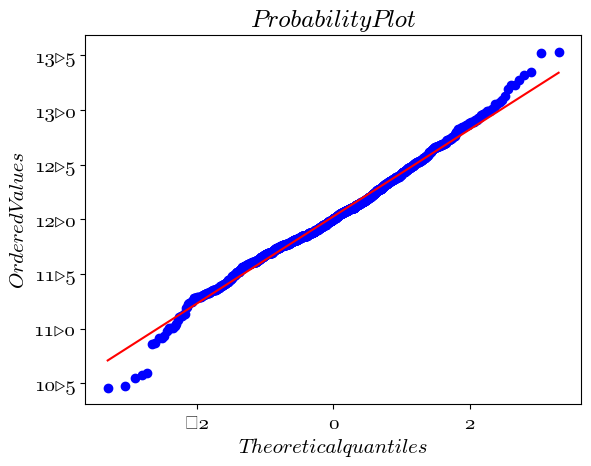

In [192]:
from scipy.stats import norm
from scipy import stats
 
sns.distplot(train_y['SalePrice'] , fit=norm);
#sns.displot(train_y['SalePrice'] , hue_norm=norm)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_y['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_y['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\2606283058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_y['SalePrice'] , fit=norm);


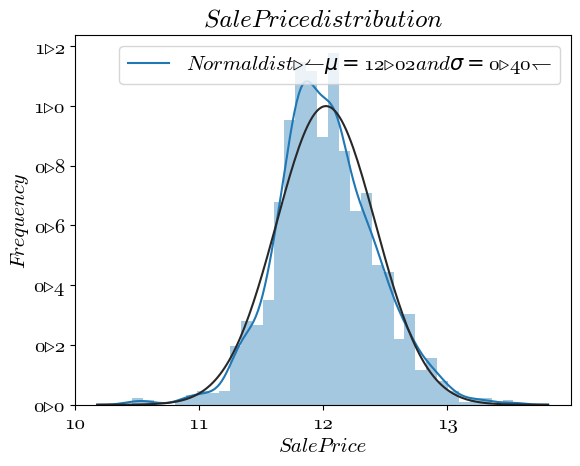

C:\Users\wayne\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


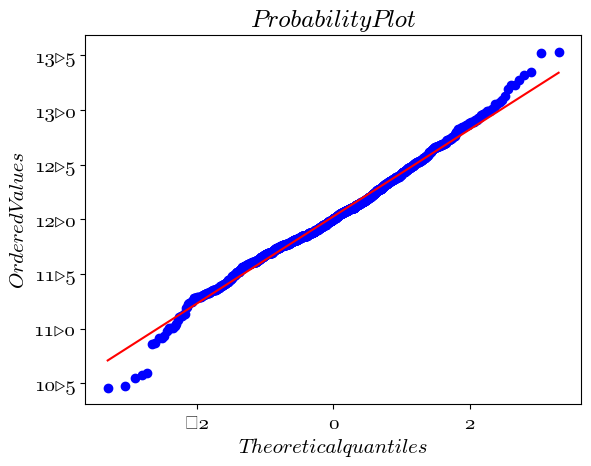

In [158]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_y["SalePrice"] = np.log1p(train_y["SalePrice"])
#Check the new distribution 
sns.distplot(train_y['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_y['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_y['SalePrice'], plot=plt)
plt.show()

C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\2473003212.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_y['SalePrice'] , fit=norm);



 mu = 12.09 and sigma = 0.09



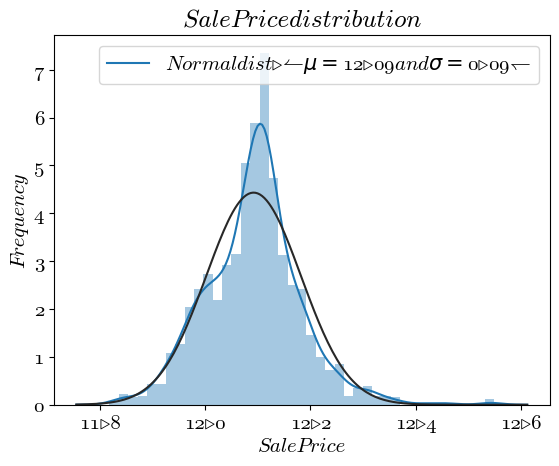

C:\Users\wayne\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


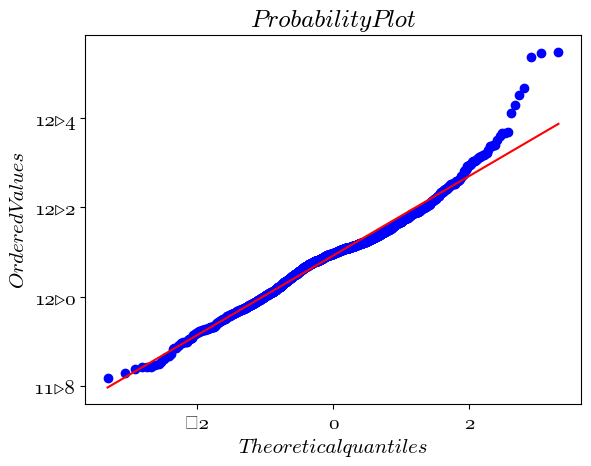

In [163]:
test_y = pd.read_csv(r"../data/house-prices-advanced-regression-techniques/sample_submission.csv")
test_y["SalePrice"] = np.log1p(test_y["SalePrice"])
sns.distplot(test_y['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(test_y['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(test_y['SalePrice'], plot=plt)
plt.show()

In [165]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [166]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [200]:
train_y_v = train_y.values.ravel()
test_y_v= test_y.values.ravel()
train_x.shape,train_y_v.shape,test_x.shape,test_y_v.shape

((1460, 78), (1460,), (1459, 78), (2918,))

In [168]:
#隨機迴歸森林
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(train_x,train_y_v)
 
#極端迴歸森林
etr = ExtraTreesRegressor()
etr.fit(train_x,train_y_v)
 
#梯度提升迴歸樹
gbr = GradientBoostingRegressor()
gbr.fit(train_x,train_y_v)

GradientBoostingRegressor()

In [169]:
name = ["RandomForestRegressor","ExtraTreesRegressor","GradientBoostingRegressor"]
model = [rfr,etr,gbr]
for n,m in zip(name,model):
    predict_y = m.predict(test_x)
    predict = pd.DataFrame(predict_y,index = test_y.index,columns = ["SalePrice"])
    score = rmse_cv(m,train_x ,train_y.values.ravel())
    print("{} mean score : {:.4f} ({:.4f})".format(n,score.mean(),score.std()))

RandomForestRegressor mean score : 0.1413 (0.0095)
ExtraTreesRegressor mean score : 0.1356 (0.0117)
GradientBoostingRegressor mean score : 0.1270 (0.0103)


<AxesSubplot: >

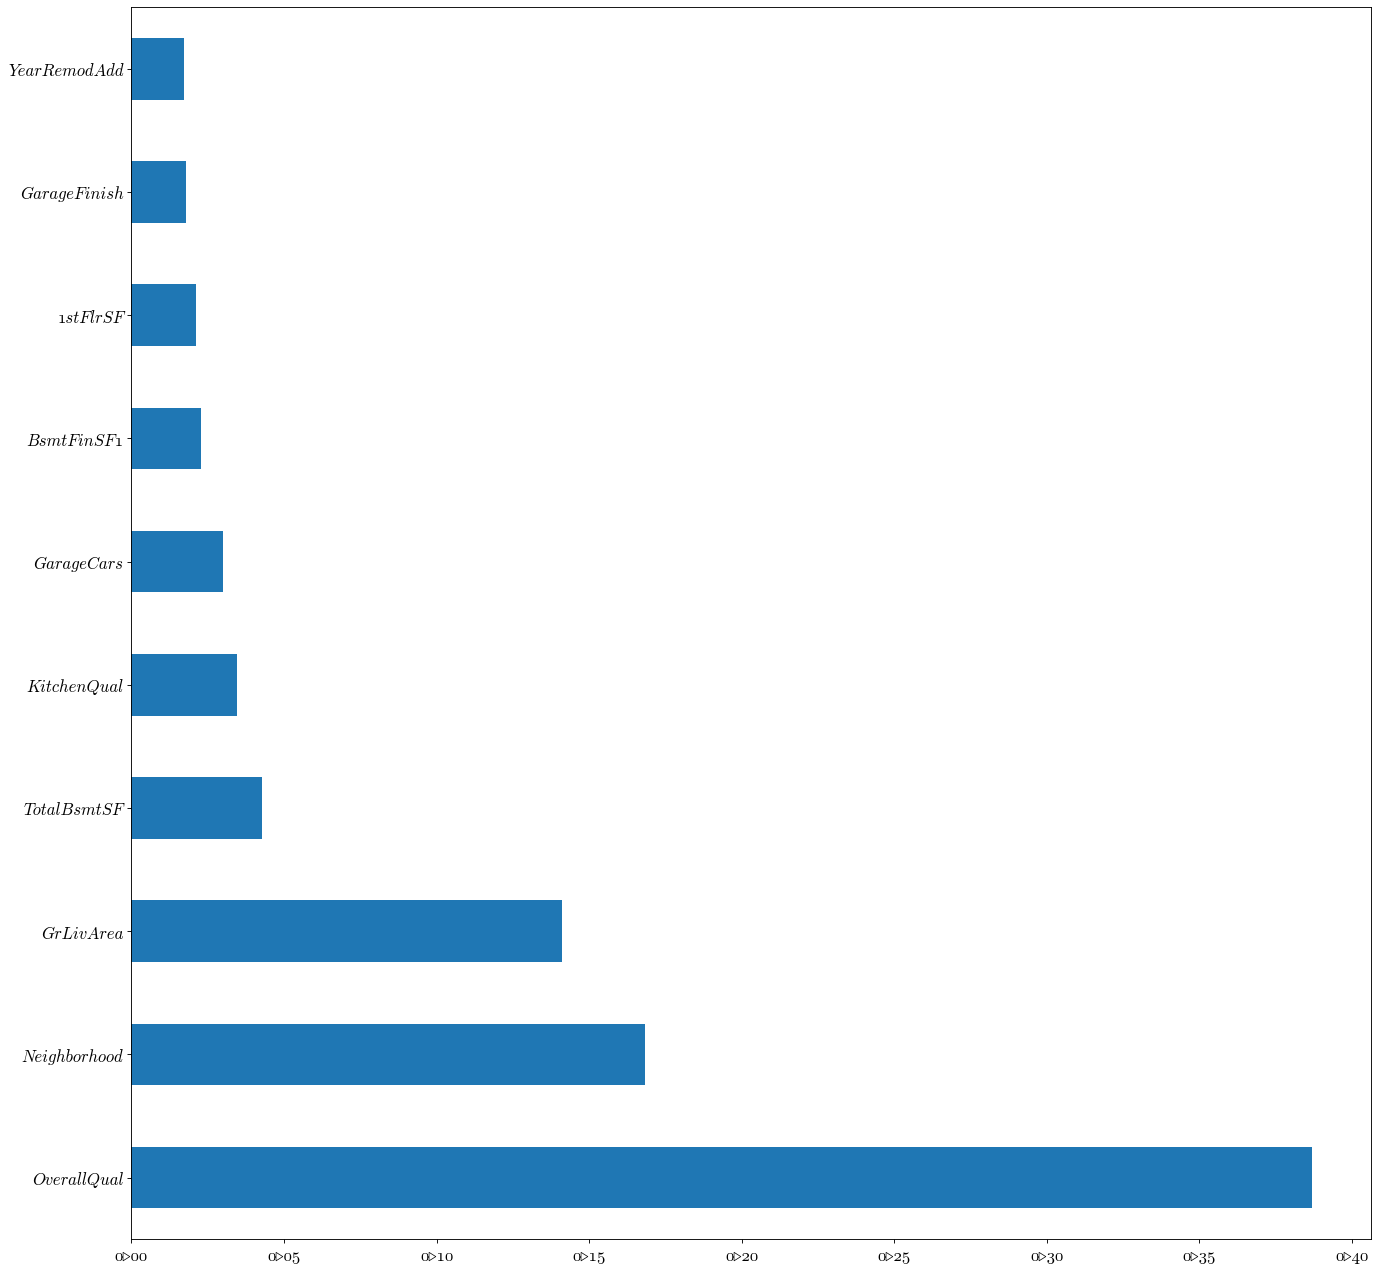

In [170]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
 
feat_importances = pd.Series(gbr.feature_importances_, index= train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [171]:
final_feature = train_x [feat_importances.nlargest(10).index]
final_feature

OverallQual  Neighborhood  GrLivArea  TotalBsmtSF  KitchenQual  \
Id                                                                     
1               7            16   7.444833     6.753438            2   
2               6            19   7.141245     7.141245            1   
3               7            16   7.488294     6.825460            2   
4               7            18   7.448916     6.629363            2   
5               8            23   7.695758     7.044033            2   
...           ...           ...        ...          ...          ...   
1456            6            13   7.407318     6.860664            1   
1457            6            14   7.637234     7.341484            1   
1458            7            18   7.758333     7.050123            2   
1459            5             9   6.983790     6.983790            2   
1460            5             4   7.136483     7.136483            1   

      GarageCars  BsmtFinSF1  1stFlrSF  GarageFinish  YearRemodAdd  
Id                                                                  
1       1.098612    6.561031  6.753438             2      7.602900  
2       1.098612    6.886532  7.141245             2      7.589336  
3       1.098612    6.188264  6.825460             2      7.602401  
4       1.386294    5.379897  6.869014             1      7.586296  
5       1.386294    6.486161  7.044033             2      7.601402  
...          ...         ...       ...           ...           ...  
1456    1.098612    0.000000  6.860664             2      7.601402  
1457    1.098612    6.673298  7.637234             1      7.595387  
1458    0.693147    5.620401  7.080868             2      7.604396  
1459    0.693147    3.912023  6.983790             1      7.599401  
1460    0.693147    6.722630  7.136483             3      7.583756  

[1460 rows x 10 columns]

In [173]:
from sklearn.linear_model import Lasso,ElasticNet,BayesianRidge
import xgboost as xgb
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import  GradientBoostingRegressor
import lightgbm as lgb
from  sklearn.svm import SVR

In [174]:
lasso = Lasso()
ENet = ElasticNet()
XGB_Model = xgb.XGBRegressor()
KRR = KernelRidge()
GBoost = GradientBoostingRegressor()
lgb_Model = lgb.LGBMRegressor()
SVR = SVR()
Bay = BayesianRidge()

In [175]:
name = ["Lasso","ElasticNet","XGBoost","KernelRidge","GradientBoostingRegressor","Lightgbm","SVR",
        "RandomForestRegressor","ExtraTreesRegressor","GradientBoostingRegressor"]
model = [lasso,ENet,XGB_Model,KRR,GBoost ,lgb_Model,SVR,Bay,rfr,gbr,etr]
for n,m in zip(name,model):
    m.fit(train_x,train_y)
    train_score = m.score(train_x,train_y)
    score = rmse_cv(m,train_x ,train_y.values.ravel())
    print("{} mean score(Standard Deviation score) : {:.4f} ({:.4f})".format(n,score.mean(),score.std()))

Lasso mean score(Standard Deviation score) : 0.3078 (0.0143)
ElasticNet mean score(Standard Deviation score) : 0.2797 (0.0124)
XGBoost mean score(Standard Deviation score) : 0.1369 (0.0106)
KernelRidge mean score(Standard Deviation score) : 0.1352 (0.0115)


c:\Users\wayne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor mean score(Standard Deviation score) : 0.1269 (0.0099)
Lightgbm mean score(Standard Deviation score) : 0.1316 (0.0083)


c:\Users\wayne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR mean score(Standard Deviation score) : 0.1379 (0.0081)


c:\Users\wayne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestRegressor mean score(Standard Deviation score) : 0.1351 (0.0111)


C:\Users\wayne\AppData\Local\Temp\ipykernel_45192\3781158426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(train_x,train_y)
c:\Users\wayne\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


ExtraTreesRegressor mean score(Standard Deviation score) : 0.1415 (0.0098)


c:\Users\wayne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor mean score(Standard Deviation score) : 0.1272 (0.0103)


In [176]:
#GBoost
GBoost_parameters = {
    "alpha" : [0.2,0.4,0.6,0.8,0.9],
    "n_estimators" : [10,100,300,500,700,1000],
    "learning_rate": [0.1,0.05,0.001,0.0005,0.0001],
    "subsample" : [0.5,0.6,0.7,0.8,0.9,1]
}

In [201]:
from sklearn.model_selection import GridSearchCV
 
def algorithm_pipeline(train_x, test_x, train_y, test_y,model, param_grid, cv=5, scoring_fit='neg_mean_squared_error'):
     
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        scoring=scoring_fit,
        verbose=2
    )
     
    fitted_model = gs.fit(train_x, train_y)
    best_model = fitted_model.best_estimator_
    best = fitted_model.best_params_
    fitted_model.cv_results_['mean_test_score']= np.sqrt(-fitted_model.cv_results_['mean_test_score'])
    data_score = pd.DataFrame( fitted_model.cv_results_)[['params','mean_test_score','std_test_score']]
     
    return [best_model,best,data_score]

In [202]:
result = algorithm_pipeline(train_x, test_x, train_y, test_y,GBoost, GBoost_parameters, cv=5, scoring_fit='neg_mean_squared_error')
print("最佳參數 : ",result[0],result[1])

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


KeyboardInterrupt: 

In [179]:
GBoost = GradientBoostingRegressor(alpha = 0.9, learning_rate =  0.05, n_estimators =  700, subsample =  0.7)
GBoost.fit(train_x,train_y)

c:\Users\wayne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=700, subsample=0.7)

In [180]:
predict = GBoost.predict(test_x)
predict = pd.DataFrame(predict,index = test_y.index,columns = ["SalePrice"])
predict_true = np.expm1(predict)
predict_true

SalePrice
0     129037.703085
1     162697.256510
2     187064.558347
3     197073.367375
4     185795.357720
...             ...
1454   79635.294463
1455   80873.141146
1456  154082.320533
1457  115880.507613
1458  197245.971454

[1459 rows x 1 columns]

In [ ]:


with open('house_predict.csv', 'w') as f: #開啟一個檔案，house_predict.csv是名字；w是寫入
    f.write('id,SalePrice\n') #寫入最上方的列，並用\n往下一列
    for i in range(len(pred)): #len(pred)看整個test有多長，然後用for去跑全部
        f.write(str(i + 1461) + ',' + str(float(pred[i])) + '\n')
        #寫入，這邊特別注意「+1461」，因為它給的sample_submission是從1461開始
        #中間加上逗號是因為前面有介紹過csv檔是以逗號為間隔的檔案
        #str(float(pred[i]):先把它變成浮點數，再用str()把它變回字串
        #後面的'\n'是要換下一列的意思
        #注意到中間全部是用「+號」隔開，這是字串的基本招式唷   

